In [1]:
import anndata
from scipy import sparse, io
import scanpy as sc
import pandas as pd
import numpy as np
import pickle

In [ ]:
integrated_obj = sc.read_h5ad("full_integrated_adata.h5ad")
integrated_obj.X.to_csv("integrated_data.csv")
integrated_obj.obs.to_csv("TumorSampleIntegratedMetaData.txt")


In [77]:
data = pd.read_csv("integrated_data.csv")

In [78]:
meta_data  = pd.read_csv("TumorSampleIntegratedMetaData.txt", sep = "\t")

/tmp/ipykernel_10375/3942699133.py:1: DtypeWarning: Columns (8,24,25,26,27,28,29,30,31,32,36) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data  = pd.read_csv("TumorSampleIntegratedMetaData.txt", sep = "\t")


In [79]:
integrated_obj_full = anndata.AnnData(data, var = meta_data)
integrated_obj_full = integrated_obj_full.T
integrated_obj = integrated_obj_full.copy()

/tmp/ipykernel_10375/1342423156.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  integrated_obj_full = anndata.AnnData(data, var = meta_data)


In [80]:
integrated_obj

AnnData object with n_obs × n_vars = 177230 × 500
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rps', 'percent.rpl', 'percent.rp', 'patient_long', 'patient', 'predicted_doublets', 'doublet_scores', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'celltype_bped_main', 'celltype_bped_fine', 'celltype_iced_main', 'celltype_iced_fine', 'celltype_hpca_main', 'celltype_hpca_fine', 'celltype_mid_main', 'celltype_mid_fine', 'Primary_vs_BM', 'STK11mut_vs_NonSTK11mut', 'Primary_BM_STK_NonSTK', 'Primary_vs_BM_vs_CHEST_WALL_MET', 'Primary_BM_STK_NonSTK_CHEST_WALL_MET', 'organ', 'group', 'ID', 'sequencing', 'RNA_snn_res.0.8', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'cell_type_fine', 'integrated_snn_res.0.5'

In [81]:
tumor_only = integrated_obj_full[
    integrated_obj_full.obs.apply(lambda x: "Tumor" in x.name, axis = 1),:]


In [82]:
tumor_only.obs.index = tumor_only.obs.apply(
    lambda x: x.name.strip("Tumor_"), axis = 1)

tumor_only.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
PA001_GCGAGAAGTACTTAGC-1      PA001       20491          6976    0.590503   
PA001_TCGGTAAAGGCAAAGA-1      PA001       18659          5631    1.045072   
PA001_CTCTAATCATGAGCGA-1      PA001       17974          5562    0.867920   
PA001_CTTTGCGAGACTGTAA-1      PA001       11223          4085    1.603849   
PA001_GTTACAGTCCAGAGGA-1      PA001        9885          4203    1.406171   
...                             ...         ...           ...         ...   
STK_1_TGTCCCAAGCACCGTC-1      STK_1         823           641    7.654921   
STK_1_GTAACGTTCGCACTCT-1      STK_1         810           652    4.567901   
STK_1_AACTGGTTCAACCAAC-1      STK_1         807           669    3.965304   
STK_1_CTCTGGTTCCTCAATT-1      STK_1         807           667    1.858736   
STK_1_AACTCTTAGTGTGGCA-1      STK_1         806           651    6.575682   

                          percent.rps  percent.rpl  percent.rp  \
PA001_GCGAGAAGTACTTAGC-1     0.214728     0.175687    0.390415   
PA001_TCGGTAAAGGCAAAGA-1     0.117906     0.123265    0.241170   
PA001_CTCTAATCATGAGCGA-1     0.139090     0.127963    0.267052   
PA001_CTTTGCGAGACTGTAA-1     0.115834     0.115834    0.231667   
PA001_GTTACAGTCCAGAGGA-1     0.060698     0.091047    0.151745   
...                               ...          ...         ...   
STK_1_TGTCCCAAGCACCGTC-1     1.579587     3.159174    4.738761   
STK_1_GTAACGTTCGCACTCT-1     2.469136     3.703704    6.172840   
STK_1_AACTGGTTCAACCAAC-1     2.354399     3.593556    5.947955   
STK_1_CTCTGGTTCCTCAATT-1     1.363073     2.850062    4.213135   
STK_1_AACTCTTAGTGTGGCA-1     3.349876     5.459057    8.808933   

                                       patient_long  \
PA001_GCGAGAAGTACTTAGC-1               nsclpa001_5p   
PA001_TCGGTAAAGGCAAAGA-1               nsclpa001_5p   
PA001_CTCTAATCATGAGCGA-1               nsclpa001_5p   
PA001_CTTTGCGAGACTGTAA-1               nsclpa001_5p   
PA001_GTTACAGTCCAGAGGA-1               nsclpa001_5p   
...                                             ...   
STK_1_TGTCCCAAGCACCGTC-1  nsclc_stk_1_5pv2_S25_L003   
STK_1_GTAACGTTCGCACTCT-1  nsclc_stk_1_5pv2_S25_L003   
STK_1_AACTGGTTCAACCAAC-1  nsclc_stk_1_5pv2_S25_L003   
STK_1_CTCTGGTTCCTCAATT-1  nsclc_stk_1_5pv2_S25_L003   
STK_1_AACTCTTAGTGTGGCA-1  nsclc_stk_1_5pv2_S25_L003   

                                            patient  predicted_doublets  ...  \
PA001_GCGAGAAGTACTTAGC-1               nsclpa001_5p                   0  ...   
PA001_TCGGTAAAGGCAAAGA-1               nsclpa001_5p                   0  ...   
PA001_CTCTAATCATGAGCGA-1               nsclpa001_5p                   0  ...   
PA001_CTTTGCGAGACTGTAA-1               nsclpa001_5p                   0  ...   
PA001_GTTACAGTCCAGAGGA-1               nsclpa001_5p                   0  ...   
...                                             ...                 ...  ...   
STK_1_TGTCCCAAGCACCGTC-1  nsclc_stk_1_5pv2_S25_L003                   0  ...   
STK_1_GTAACGTTCGCACTCT-1  nsclc_stk_1_5pv2_S25_L003                   0  ...   
STK_1_AACTGGTTCAACCAAC-1  nsclc_stk_1_5pv2_S25_L003                   0  ...   
STK_1_CTCTGGTTCCTCAATT-1  nsclc_stk_1_5pv2_S25_L003                   0  ...   
STK_1_AACTCTTAGTGTGGCA-1  nsclc_stk_1_5pv2_S25_L003                   0  ...   

                          RNA_snn_res.0.8  n_genes  doublet_score  \
PA001_GCGAGAAGTACTTAGC-1              NaN      NaN            NaN   
PA001_TCGGTAAAGGCAAAGA-1              NaN      NaN            NaN   
PA001_CTCTAATCATGAGCGA-1              NaN      NaN            NaN   
PA001_CTTTGCGAGACTGTAA-1              NaN      NaN            NaN   
PA001_GTTACAGTCCAGAGGA-1              NaN      NaN            NaN   
...                                   ...      ...            ...   
STK_1_TGTCCCAAGCACCGTC-1              NaN      NaN            NaN   
STK_1_GTAACGTTCGCACTCT-1              NaN      NaN            NaN   
STK_1_AACTGGTTCAACCAAC-1              NaN      NaN            Na

In [83]:
df = pd.read_csv("../ComputeModuleScores/modulescores.csv").set_index(
     "Unnamed: 0")

df = df[df.index.isin(tumor_only.obs.index)]

tumor_only.obs = df


In [84]:
sc.pp.neighbors(integrated_obj)


         Falling back to preprocessing with `sc.pp.pca` and default params.


In [85]:
sc.tl.umap(integrated_obj)

In [86]:
sc.pp.neighbors(tumor_only)


         Falling back to preprocessing with `sc.pp.pca` and default params.


In [87]:
sc.tl.umap(tumor_only)

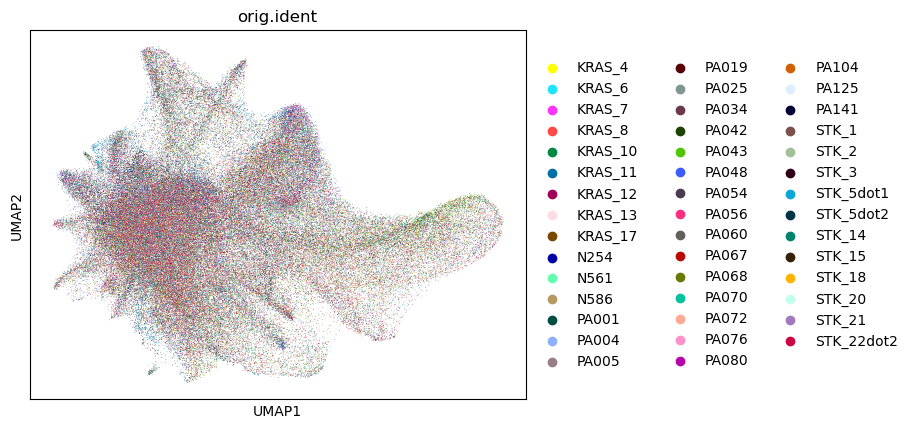

In [88]:
sc.pl.umap(tumor_only, color=["orig.ident"])

In [89]:
tumor_only

AnnData object with n_obs × n_vars = 144554 × 500
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rps', 'percent.rpl', 'percent.rp', 'patient_long', 'patient', 'predicted_doublets', 'doublet_scores', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'celltype_bped_main', 'celltype_bped_fine', 'celltype_iced_main', 'celltype_iced_fine', 'celltype_hpca_main', 'celltype_hpca_fine', 'celltype_mid_main', 'celltype_mid_fine', 'Primary_vs_BM', 'STK11mut_vs_NonSTK11mut', 'Primary_BM_STK_NonSTK', 'Primary_vs_BM_vs_CHEST_WALL_MET', 'Primary_BM_STK_NonSTK_CHEST_WALL_MET', 'dev__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 'dev__ASC_SMITH_CELL20181', 'dev__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 'dev__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 'dev__AEP_MORRISEY_2FC1', 'dev__Cluster.211', 'long__Club.cells1', 'long__Ciliated1', 'long__Basal1', 'long__Goblet1', 'long__AT11', 'long__AT21', 'long__AEP1', 'devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 'devST__

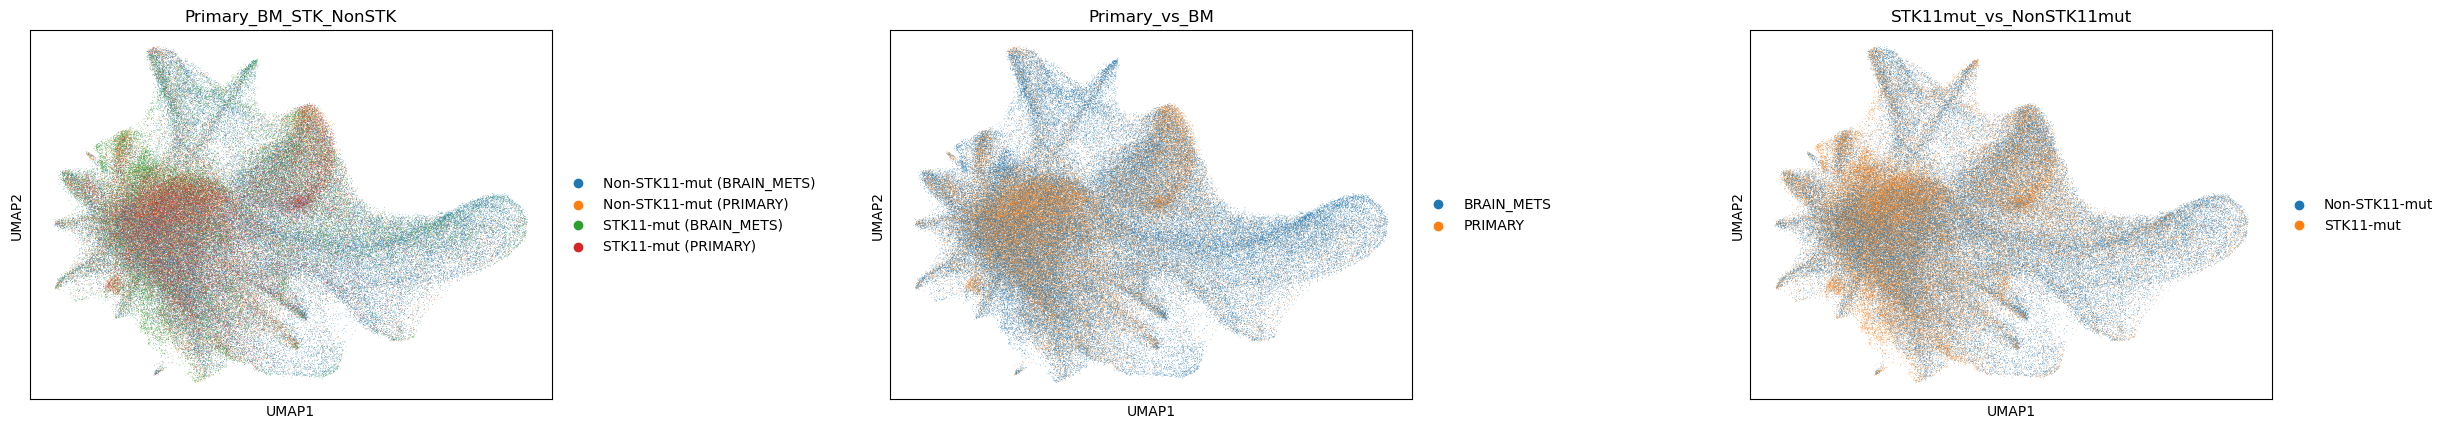

In [90]:
sc.pl.umap(tumor_only, color=["Primary_BM_STK_NonSTK", 
                              'Primary_vs_BM',
                              'STK11mut_vs_NonSTK11mut'],
           wspace = 0.5
          )

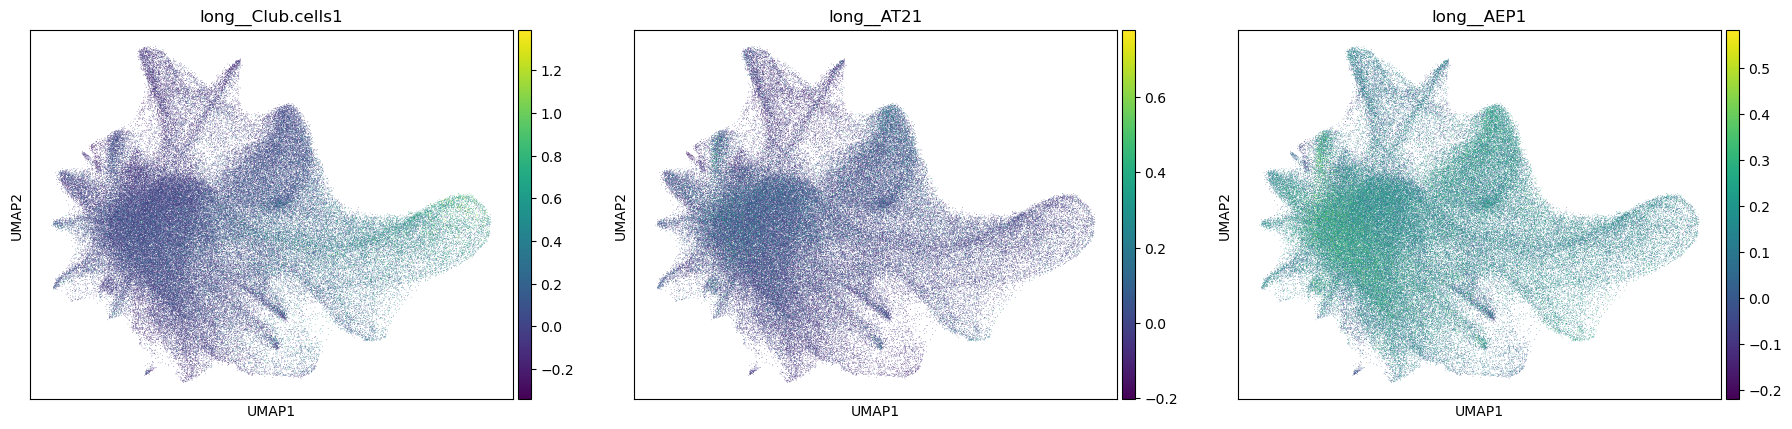

In [91]:
import matplotlib
matplotlib.rc_file_defaults()
sc.pl.umap(tumor_only, color=["long__Club.cells1", 
                             'long__AT21',
                             'long__AEP1'])

In [92]:
set(tumor_only.obs["STK11mut_vs_NonSTK11mut"])

{'Non-STK11-mut', 'STK11-mut'}

In [93]:
cluster_21_cells = pd.read_csv("../ComputeModuleScores/Cluster_21.csv")


In [94]:
tumor_only.obs["cluster21"] = tumor_only.obs.index.isin(cluster_21_cells["Unnamed: 0"])

tumor_only.obs = tumor_only.obs.replace({'cluster21': {True: 'Cluster 21', False: 'Not Cluster 21'}})

In [95]:
from scipy import stats

Primary_BM_STK_NonSTK_pval = stats.kruskal(tumor_only.obs[tumor_only.obs["Primary_BM_STK_NonSTK"] == 'Non-STK11-mut (BRAIN_METS)']["long__Club.cells1"],
              tumor_only.obs[tumor_only.obs["Primary_BM_STK_NonSTK"] == 'Non-STK11-mut (PRIMARY)']["long__Club.cells1"],
              tumor_only.obs[tumor_only.obs["Primary_BM_STK_NonSTK"] == 'STK11-mut (BRAIN_METS)']["long__Club.cells1"],
              tumor_only.obs[tumor_only.obs["Primary_BM_STK_NonSTK"] == 'STK11-mut (PRIMARY)']["long__Club.cells1"]
              )

primary_bm_pval = stats.kruskal(tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'BRAIN_METS']["long__Club.cells1"],
              tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'PRIMARY']["long__Club.cells1"]
              )


stk11_non11_pval = stats.kruskal(tumor_only.obs[tumor_only.obs["STK11mut_vs_NonSTK11mut"] == 'Non-STK11-mut']["long__Club.cells1"],
              tumor_only.obs[tumor_only.obs["STK11mut_vs_NonSTK11mut"] == 'STK11-mut']["long__Club.cells1"]
              )

cluster_21_pval = stats.kruskal(tumor_only.obs[tumor_only.obs["cluster21"] == 'cluster_21']["long__Club.cells1"],
              tumor_only.obs[tumor_only.obs["cluster21"] == 'not.cluster_21']["long__Club.cells1"]
              )

print("Primary_BM_STK_NonSTK")
print(Primary_BM_STK_NonSTK_pval)
print("Primary_vs_BM")
print(primary_bm_pval)
print("STK11mut_vs_NonSTK11mut")
print(stk11_non11_pval)

print("cluster21")
print(cluster_21_pval)

Primary_BM_STK_NonSTK
KruskalResult(statistic=17444.062554969685, pvalue=0.0)
Primary_vs_BM
KruskalResult(statistic=1794.5547043470433, pvalue=0.0)
STK11mut_vs_NonSTK11mut
KruskalResult(statistic=13718.58473588695, pvalue=0.0)
cluster21
KruskalResult(statistic=nan, pvalue=nan)


In [96]:
from pprint import pprint
import scipy
pprint ([(i, scipy.stats.ks_2samp(tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'PRIMARY']["long__Club.cells1"]
                                  
                , tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'BRAIN_METS']["long__Club.cells1"][:i])[1]) 
                for i in range(200,len(tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'BRAIN_METS']["long__Club.cells1"]),200)])


[(200, 1.1613587487717167e-53),
 (400, 3.773209168995034e-14),
 (600, 1.2823397058951306e-25),
 (800, 2.142248430154796e-49),
 (1000, 2.7397526814440068e-73),
 (1200, 2.4679563078140037e-105),
 (1400, 2.1340493965730528e-132),
 (1600, 2.3250585822780712e-164),
 (1800, 4.260970595038335e-197),
 (2000, 2.1291437659336563e-230),
 (2200, 3.343205960615792e-275),
 (2400, 2.117050334e-315),
 (2600, 0.0),
 (2800, 0.0),
 (3000, 0.0),
 (3200, 0.0),
 (3400, 0.0),
 (3600, 0.0),
 (3800, 0.0),
 (4000, 0.0),
 (4200, 0.0),
 (4400, 0.0),
 (4600, 0.0),
 (4800, 0.0),
 (5000, 0.0),
 (5200, 0.0),
 (5400, 0.0),
 (5600, 0.0),
 (5800, 0.0),
 (6000, 0.0),
 (6200, 0.0),
 (6400, 0.0),
 (6600, 0.0),
 (6800, 0.0),
 (7000, 0.0),
 (7200, 0.0),
 (7400, 0.0),
 (7600, 0.0),
 (7800, 0.0),
 (8000, 0.0),
 (8200, 0.0),
 (8400, 0.0),
 (8600, 0.0),
 (8800, 0.0),
 (9000, 0.0),
 (9200, 0.0),
 (9400, 0.0),
 (9600, 0.0),
 (9800, 0.0),
 (10000, 0.0),
 (10200, 0.0),
 (10400, 0.0),
 (10600, 0.0),
 (10800, 0.0),
 (11000, 0.0),
 (11

In [97]:
cluster_21_pval = stats.kruskal(tumor_only.obs[tumor_only.obs["cluster21"] == 'Cluster 21']["long__Basal1"],
              tumor_only.obs[tumor_only.obs["cluster21"] == 'Not Cluster 21']["long__Basal1"])

print(cluster_21_pval)

KruskalResult(statistic=1107.2277340498986, pvalue=8.871206229830048e-243)


In [105]:
cluster_21_pval = stats.kruskal(tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'PRIMARY']["long__Basal1"],
              tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'BRAIN_METS']["long__Basal1"])

print(cluster_21_pval)

KruskalResult(statistic=22590.87468112621, pvalue=0.0)


In [106]:
from pprint import pprint
import scipy
pprint ([(i, scipy.stats.ks_2samp(tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'PRIMARY']["long__Basal1"]
                                  
                , tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'BRAIN_METS']["long__Basal1"][:i])[1]) 
                for i in range(200,len(tumor_only.obs[tumor_only.obs["Primary_vs_BM"] == 'BRAIN_METS']["long__Basal1"]),200)])


[(200, 5.621579606061111e-37),
 (400, 1.1320436697045714e-33),
 (600, 1.4012239772058428e-17),
 (800, 8.363267589509043e-11),
 (1000, 1.0719083872421933e-06),
 (1200, 4.6304570410278585e-10),
 (1400, 1.0470507580914435e-18),
 (1600, 9.556732386881782e-25),
 (1800, 3.721368316879256e-33),
 (2000, 6.184489804994737e-42),
 (2200, 2.1910728791151142e-51),
 (2400, 7.538106500020149e-60),
 (2600, 2.2235506724614656e-68),
 (2800, 2.3160940486029628e-79),
 (3000, 1.3658681707772647e-88),
 (3200, 1.1078502424964177e-94),
 (3400, 2.2311937078708046e-96),
 (3600, 3.5947805098127376e-95),
 (3800, 1.4130662335019894e-95),
 (4000, 2.2461660423913655e-90),
 (4200, 8.384301104296026e-82),
 (4400, 1.0725380067332108e-70),
 (4600, 2.3364306136501855e-56),
 (4800, 2.254307818000637e-42),
 (5000, 1.6715462901125435e-32),
 (5200, 1.479779301550654e-24),
 (5400, 9.95453714480964e-26),
 (5600, 1.6429057444837747e-36),
 (5800, 7.585137718420474e-50),
 (6000, 3.8765638849319495e-69),
 (6200, 6.277978582453476e

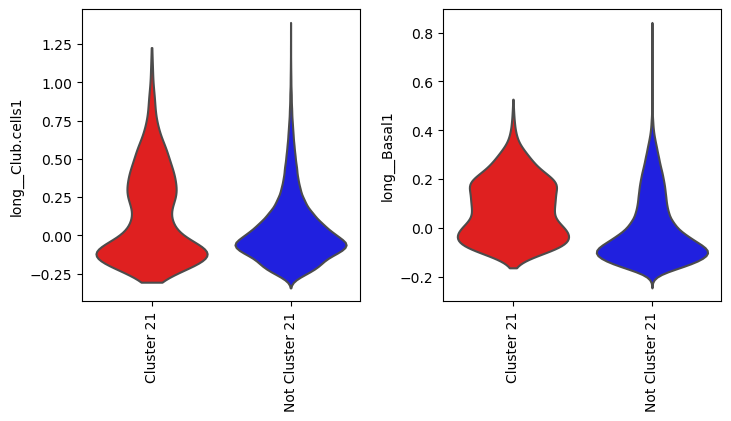

In [98]:
colors = {
    'Cluster 21': "#FF0000",
    'Not Cluster 21': "#0000FF"
}
import matplotlib.pyplot as plt

matplotlib.rc_file_defaults()

plt.rcParams['figure.figsize']=(4,4)


t = sc.pl.violin(tumor_only, keys=["long__Club.cells1", 
                              #'long__Ciliated1', 
                              'long__Basal1',
                             #'long__Goblet1',
                             #'long__AT11', 
                             #'long__AT21',
                             #'long__AEP1',
                                #'devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               #'devST__ASC_SMITH_CELL20181', 
                               #'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               #'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               #'devST__AEP_MORRISEY_2FC1', 
                               #'devST__Cluster_211'
                              ], palette = colors,
             groupby='cluster21', rotation=90, size = 0)



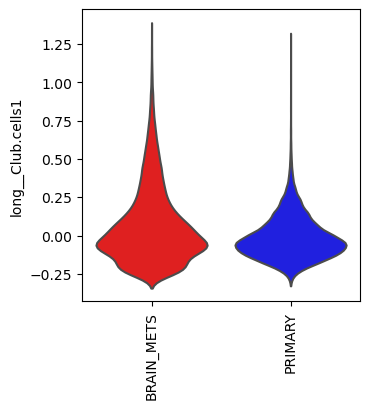

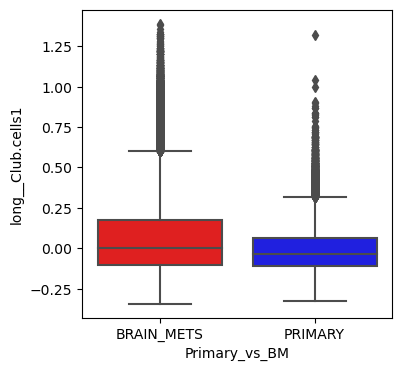

In [102]:
colors = {
    'BRAIN_METS': "#FF0000",
    'PRIMARY': "#0000FF"
}
sc.pl.violin(tumor_only, keys=["long__Club.cells1", 
                              #'long__Ciliated1', 
                              #'long__Basal1',
                             #'long__Goblet1',
                             #'long__AT11', 
                             #'long__AT21',
                             #'long__AEP1',
                                #'devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               #'devST__ASC_SMITH_CELL20181', 
                               #'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               #'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               #'devST__AEP_MORRISEY_2FC1', 
                               #'devST__Cluster_211'
                              ], palette = colors,
             groupby='Primary_vs_BM', rotation=90, size = 0, )
ax = sns.boxplot(data=tumor_only.obs, x = 'Primary_vs_BM', palette = colors, y = "long__Club.cells1")


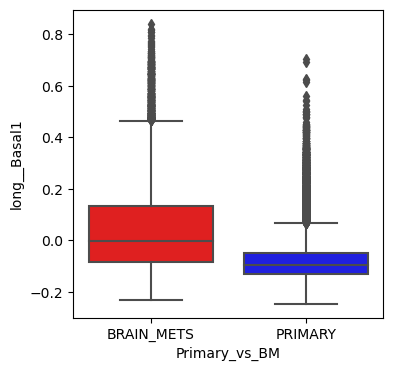

In [103]:
ax = sns.boxplot(data=tumor_only.obs, x = 'Primary_vs_BM', palette = colors, y = "long__Basal1")


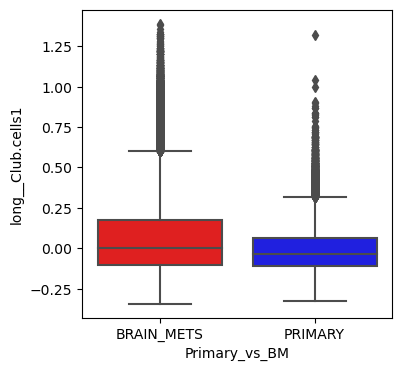

In [104]:
ax = sns.boxplot(data=tumor_only.obs, x = 'Primary_vs_BM', palette = colors, y = "long__Club.cells1")


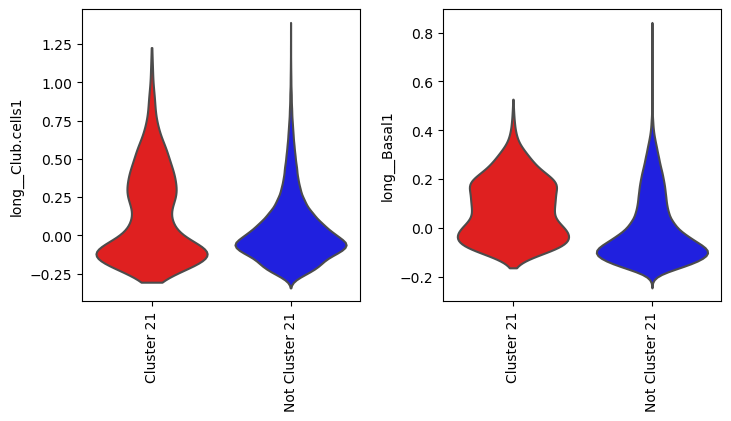

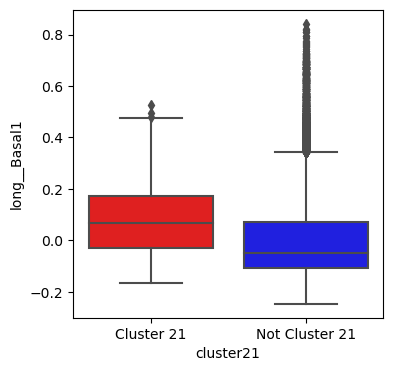

In [100]:
colors = {
    'Cluster 21': "#FF0000",
    'Not Cluster 21': "#0000FF"
}
import matplotlib.pyplot as plt

matplotlib.rc_file_defaults()

plt.rcParams['figure.figsize']=(4,4)


t = sc.pl.violin(tumor_only, keys=["long__Club.cells1", 
                              #'long__Ciliated1', 
                              'long__Basal1',
                             #'long__Goblet1',
                             #'long__AT11', 
                             #'long__AT21',
                             #'long__AEP1',
                                #'devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               #'devST__ASC_SMITH_CELL20181', 
                               #'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               #'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               #'devST__AEP_MORRISEY_2FC1', 
                               #'devST__Cluster_211'
                              ], palette = colors,
             groupby='cluster21', rotation=90, size = 0)

ax = sns.boxplot(data=tumor_only.obs, x = 'cluster21', palette = colors, y = "long__Basal1")


orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
Unnamed: 0                                                                    
PA001_GCGAGAAGTACTTAGC-1        PA001       20491          6976    0.590503   
STK_14_CGAACATGTGACAAAT-1      STK_14        8019          3575    0.037411   
STK_14_TTTCCTCTCTATGTGG-1      STK_14        7960          3772    1.934673   
STK_14_CTCGTCAGTGTGGTTT-1      STK_14        8137          3904    3.256729   
STK_14_TTTATGCCAGAAGCAC-1      STK_14        8120          3899    0.123153   
...                               ...         ...           ...         ...   
STK_21_ACACCAACACCCAGTG-1      STK_21        8646          3865    0.069396   
STK_21_GCATGTACACACATGT-1      STK_21        8713          3561    0.000000   
STK_21_CAGATCATCACGCGGT-1      STK_21        8722          3398    0.000000   
STK_21_CAACTAGTCTACGAGT-1      STK_21        8807          3680    0.420120   
KRAS_11_GGACAAGTCCACGTTC-1    KRAS_11        6913          3112    0.260379   

                            percent.rps  percent.rpl  percent.rp  \
Unnamed: 0                                                         
PA001_GCGAGAAGTACTTAGC-1       0.214728     0.175687    0.390415   
STK_14_CGAACATGTGACAAAT-1      0.112233     0.124704    0.236937   
STK_14_TTTCCTCTCTATGTGG-1      0.150754     0.075377    0.226131   
STK_14_CTCGTCAGTGTGGTTT-1      0.196633     0.319528    0.516161   
STK_14_TTTATGCCAGAAGCAC-1      0.147783     0.073892    0.221675   
...                                 ...          ...         ...   
STK_21_ACACCAACACCCAGTG-1      0.115660     0.023132    0.138793   
STK_21_GCATGTACACACATGT-1      0.103294     0.000000    0.103294   
STK_21_CAGATCATCACGCGGT-1      0.114653     0.011465    0.126118   
STK_21_CAACTAGTCTACGAGT-1      0.102191     0.102191    0.204383   
KRAS_11_GGACAAGTCCACGTTC-1     0.014465     0.028931    0.043396   

                             patient_long        patient  predicted_doublets  \
Unnamed: 0                                                                     
PA001_GCGAGAAGTACTTAGC-1     nsclpa001_5p   nsclpa001_5p               False   
STK_14_CGAACATGTGACAAAT-1    NSCLC_STK_14   NSCLC_STK_14               False   
STK_14_TTTCCTCTCTATGTGG-1    NSCLC_STK_14   NSCLC_STK_14               False   
STK_14_CTCGTCAGTGTGGTTT-1    NSCLC_STK_14   NSCLC_STK_14               False   
STK_14_TTTATGCCAGAAGCAC-1    NSCLC_STK_14   NSCLC_STK_14               False   
...                                   ...            ...                 ...   
STK_21_ACACCAACACCCAGTG-1    NSCLC_STK_21   NSCLC_STK_21               False   
STK_21_GCATGTACACACATGT-1    NSCLC_STK_21   NSCLC_STK_21               False   
STK_21_CAGATCATCACGCGGT-1    NSCLC_STK_21   NSCLC_STK_21               False   
STK_21_CAACTAGTCTACGAGT-1    NSCLC_STK_21   NSCLC_STK_21               False   
KRAS_11_GGACAAGTCCACGTTC-1  NSCLC_KRAS_11  NSCLC_KRAS_11               False   

                            ...  long__AT11  long__AT21  long__AEP1  \
Unnamed: 0                  ...                                       
PA001_GCGAGAAGTACTTAGC-1    ...   -0.146490   -0.165300   -0.043196   
STK_14_CGAACATGTGACAAAT-1   ...    0.051751   -0.137663    0.051271   
STK_14_TTTCCTCTCTATGTGG-1   ...   -0.002936   -0.083614    0.086212   
STK_14_CTCGTCAGTGTGGTTT-1   ...    0.201751   -0.132398    0.074060   
STK_14_TTTATGCCAGAAGCAC-1   ...    0.002131   -0.147682   -0.006223   
...                         ...         ...         ...         ...   
STK_21_ACACCAACACCCAGTG-1   ...    0.031918   -0.010643    0.108275   
STK_21_GCATGTACACACATGT-1   ...   -0.014689   -0.002027    0.166795   
STK_21_CAGATCATCACGCGGT-1   ...   -0.066926   -0.073558    0.086634   
STK_21_CAACTAGTCTACGAGT-1   ...    0.034559    0.001605    0.135850   
KRAS_11_GGACAAGTCCACGTTC-1  ...    0.361737    0.038250    0.352975   

                            devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1  \
Unnamed: 0                                                           
PA001_GCG

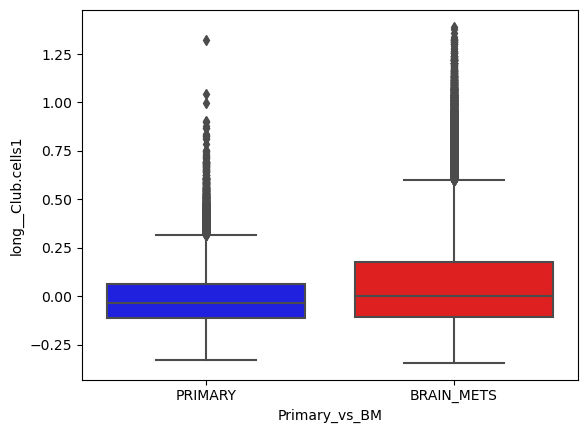

In [74]:
import seaborn as sns
import matplotlib

matplotlib.rc_file_defaults()

colors = {
    'BRAIN_METS': "#FF0000",
    'PRIMARY': "#0000FF"
}
ax = sns.boxplot(data=tumor_only.obs.sort_values(by=['Primary_vs_BM']), y = 'long__Club.cells1', palette = colors, x = "Primary_vs_BM", order=["PRIMARY", "BRAIN_METS"])



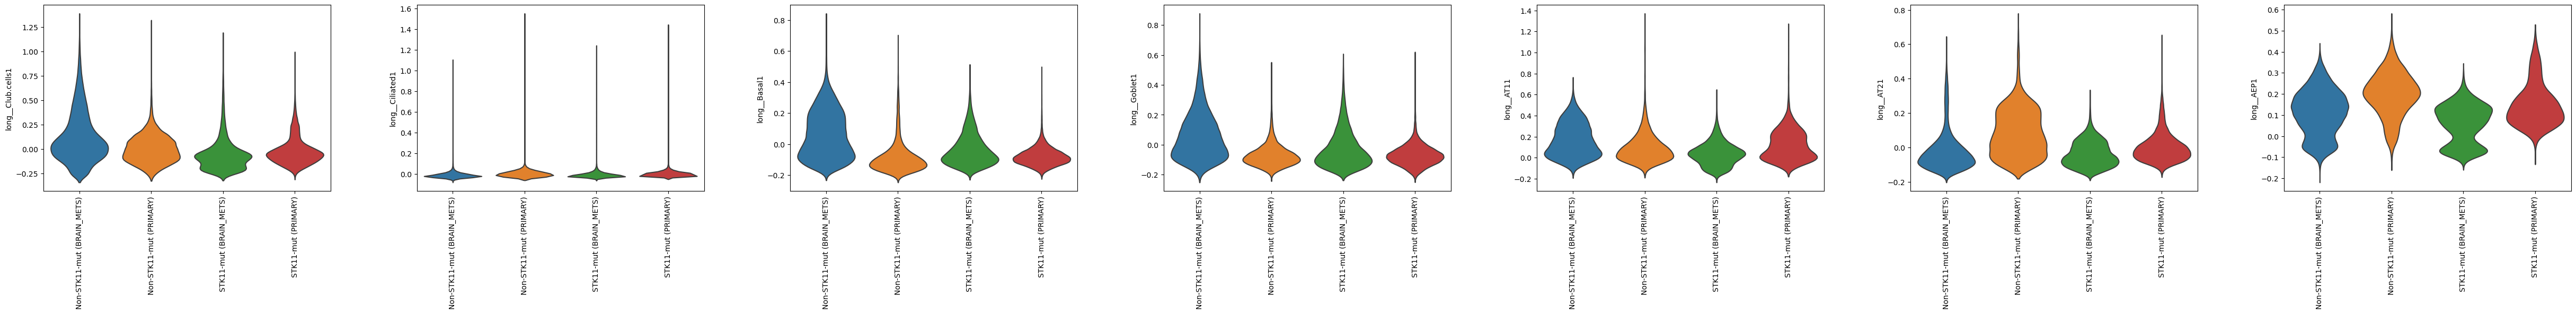

In [22]:
sc.pl.violin(tumor_only, keys=["long__Club.cells1", 
                              'long__Ciliated1', 
                              'long__Basal1',
                             'long__Goblet1',
                             'long__AT11', 
                             'long__AT21',
                             'long__AEP1',
                                #'devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               #'devST__ASC_SMITH_CELL20181', 
                               #'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               #'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               #'devST__AEP_MORRISEY_2FC1', 
                               #'devST__Cluster_211'
                              ], 
             groupby='Primary_BM_STK_NonSTK', rotation=90, size = 0)


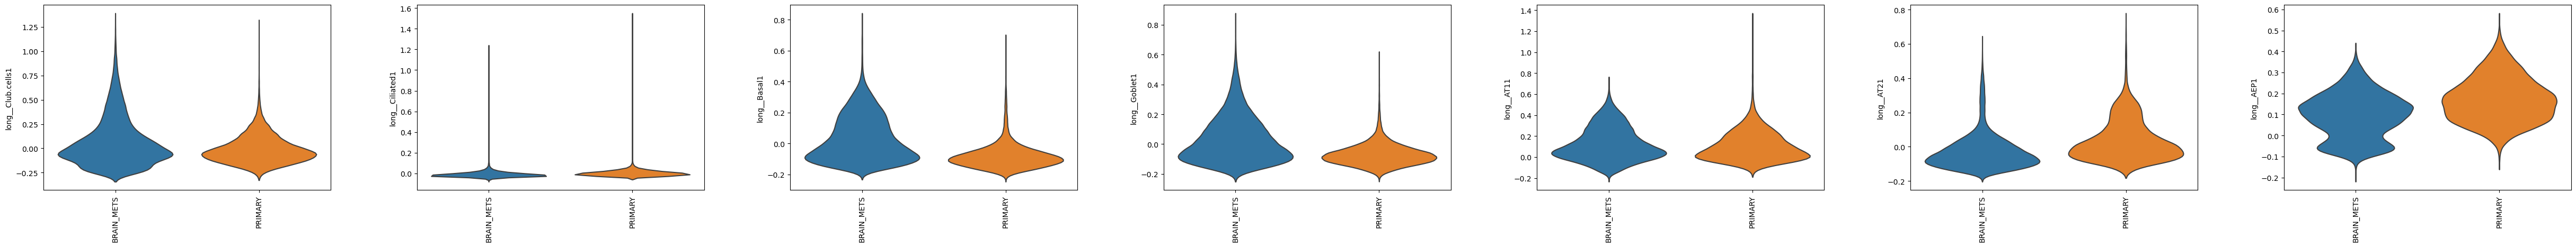

In [23]:
sc.pl.violin(tumor_only, keys=["long__Club.cells1", 
                              'long__Ciliated1', 
                              'long__Basal1',
                             'long__Goblet1',
                             'long__AT11', 
                             'long__AT21',
                             'long__AEP1',
                                #'devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               #'devST__ASC_SMITH_CELL20181', 
                               #'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               #'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               #'devST__AEP_MORRISEY_2FC1', 
                               #'devST__Cluster_211'
                              ], 
             groupby='Primary_vs_BM', rotation=90, size = 0)


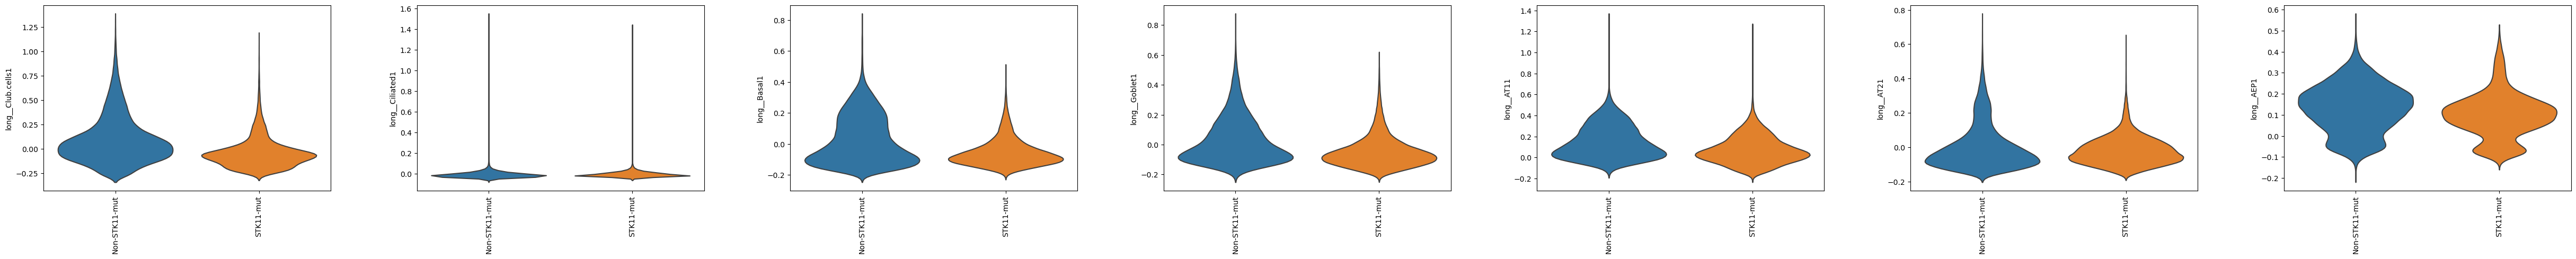

In [24]:
sc.pl.violin(tumor_only, keys=["long__Club.cells1", 
                              'long__Ciliated1', 
                              'long__Basal1',
                             'long__Goblet1',
                             'long__AT11', 
                             'long__AT21',
                             'long__AEP1',
                                 #'devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               #'devST__ASC_SMITH_CELL20181', 
                               #'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               #'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               #'devST__AEP_MORRISEY_2FC1', 
                               #'devST__Cluster_211'
                              ], 
             groupby='STK11mut_vs_NonSTK11mut', rotation=90, size = 0)

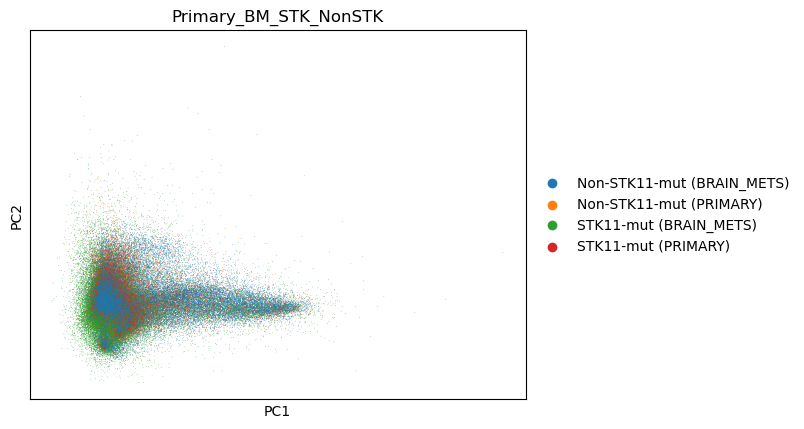

In [90]:
sc.pl.pca(tumor_only, color=["Primary_BM_STK_NonSTK"])

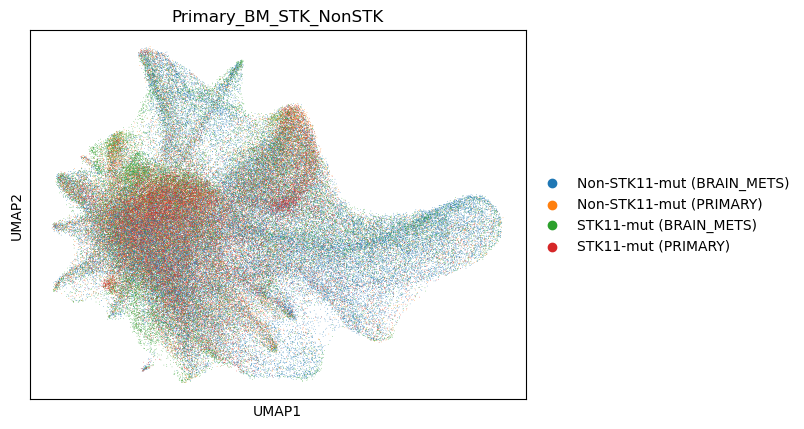

In [91]:
sc.pl.umap(tumor_only, color=["Primary_BM_STK_NonSTK"])

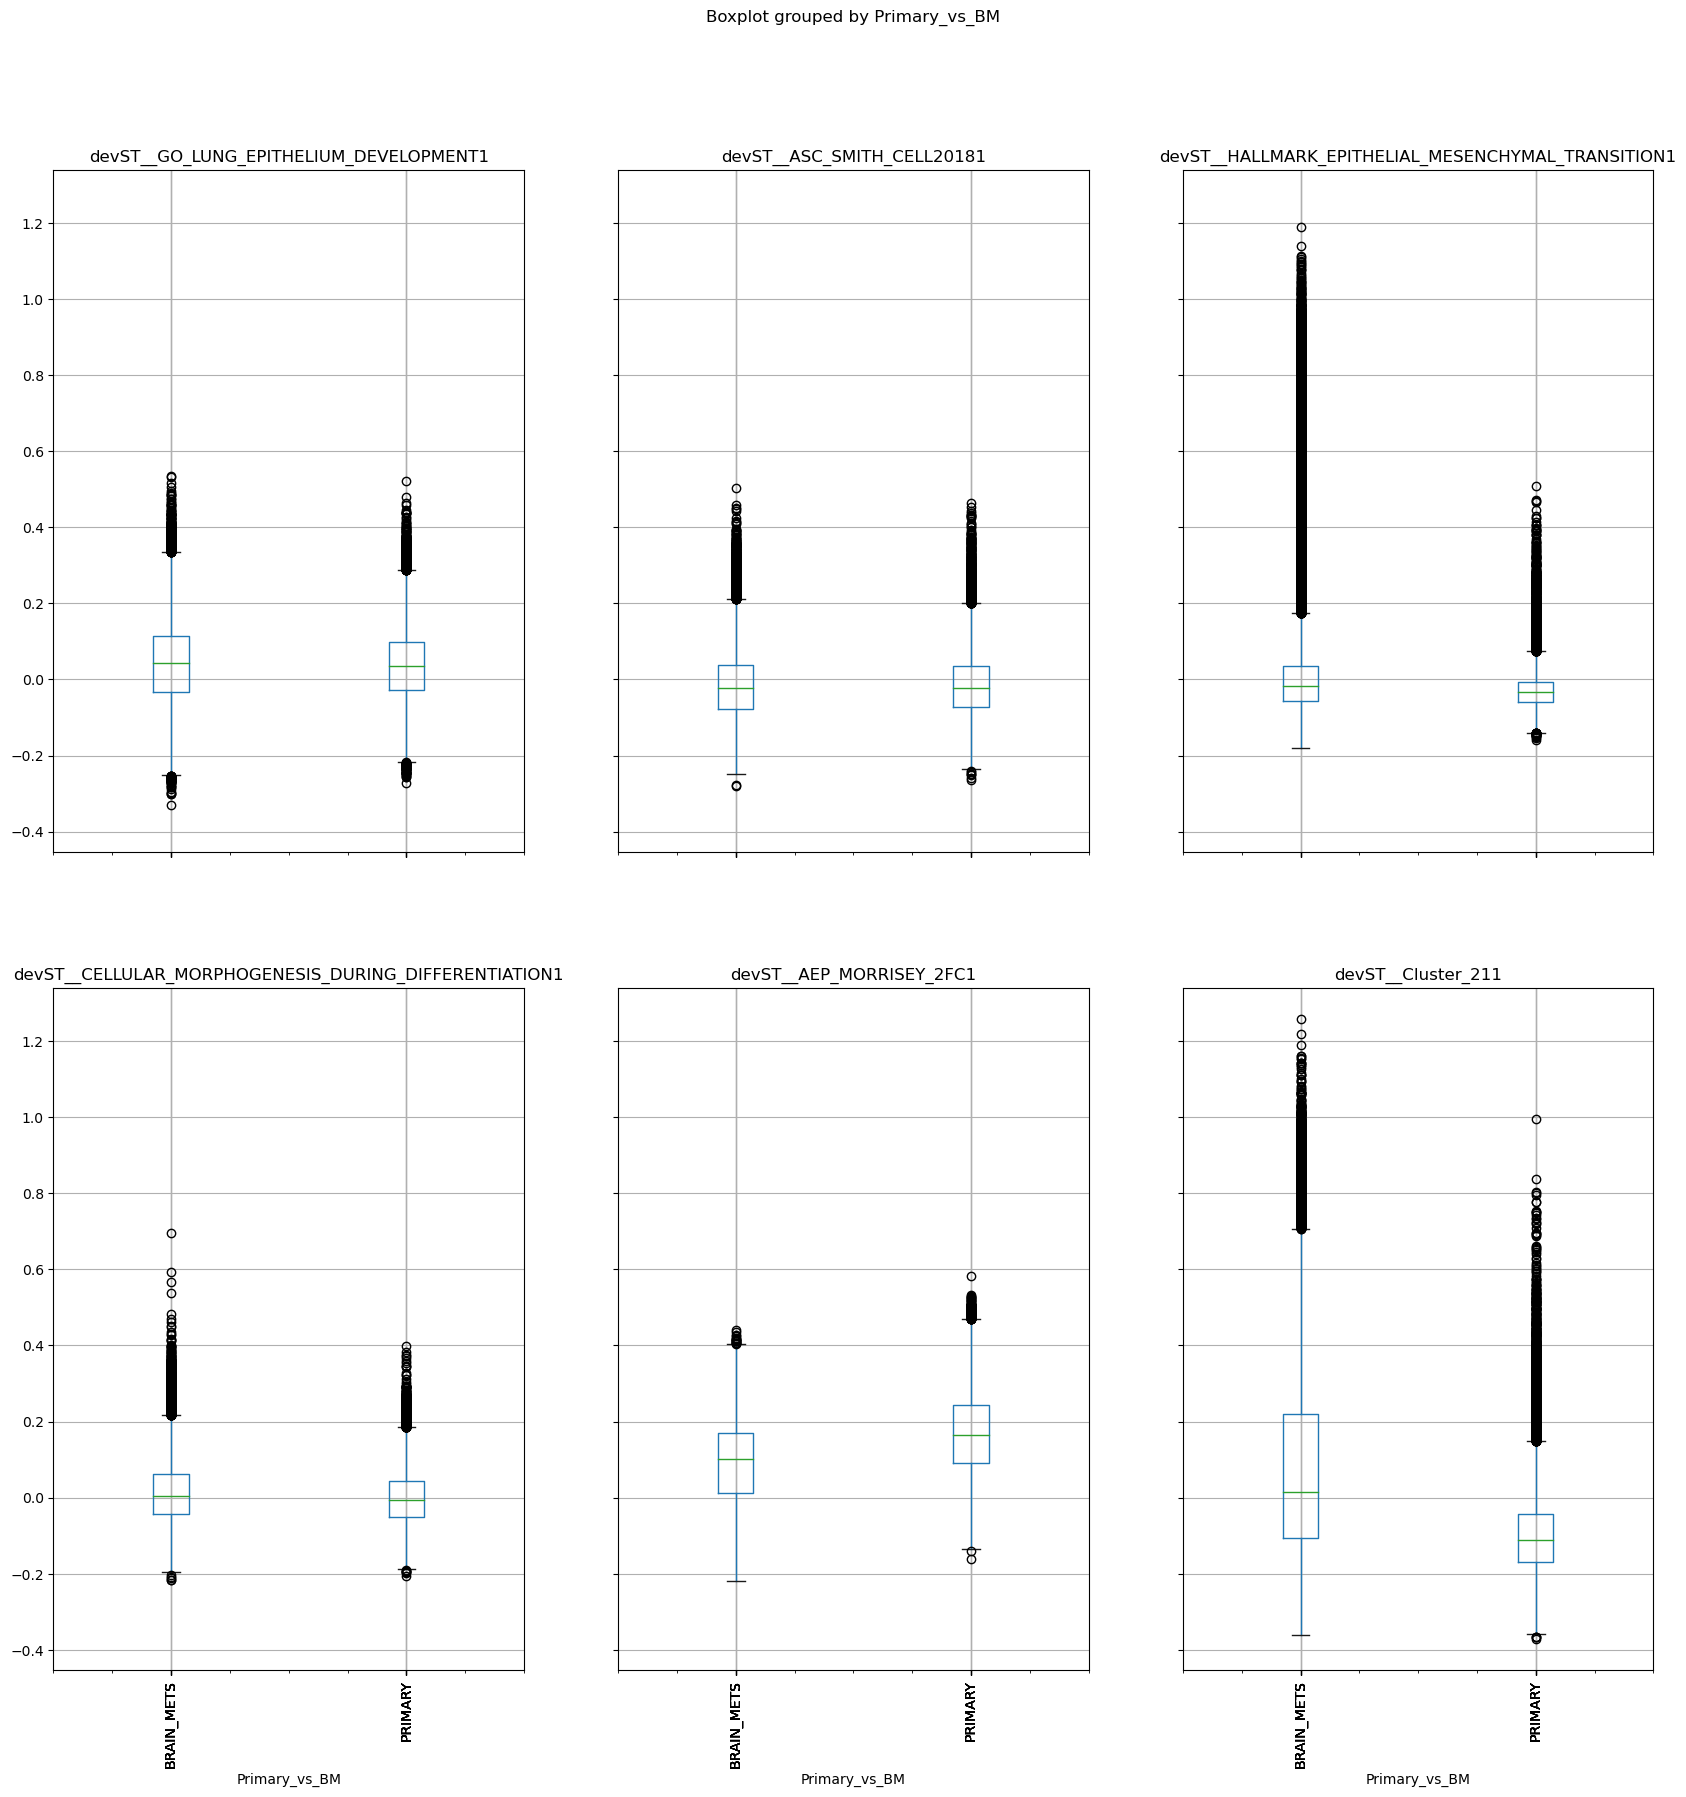

In [92]:
boxplot = tumor_only.obs.boxplot(column=['devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               'devST__ASC_SMITH_CELL20181', 
                               'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               'devST__AEP_MORRISEY_2FC1', 
                               'devST__Cluster_211'], by='Primary_vs_BM',layout=(2, 3),
                                 rot=90,figsize = (20,20)
                     )


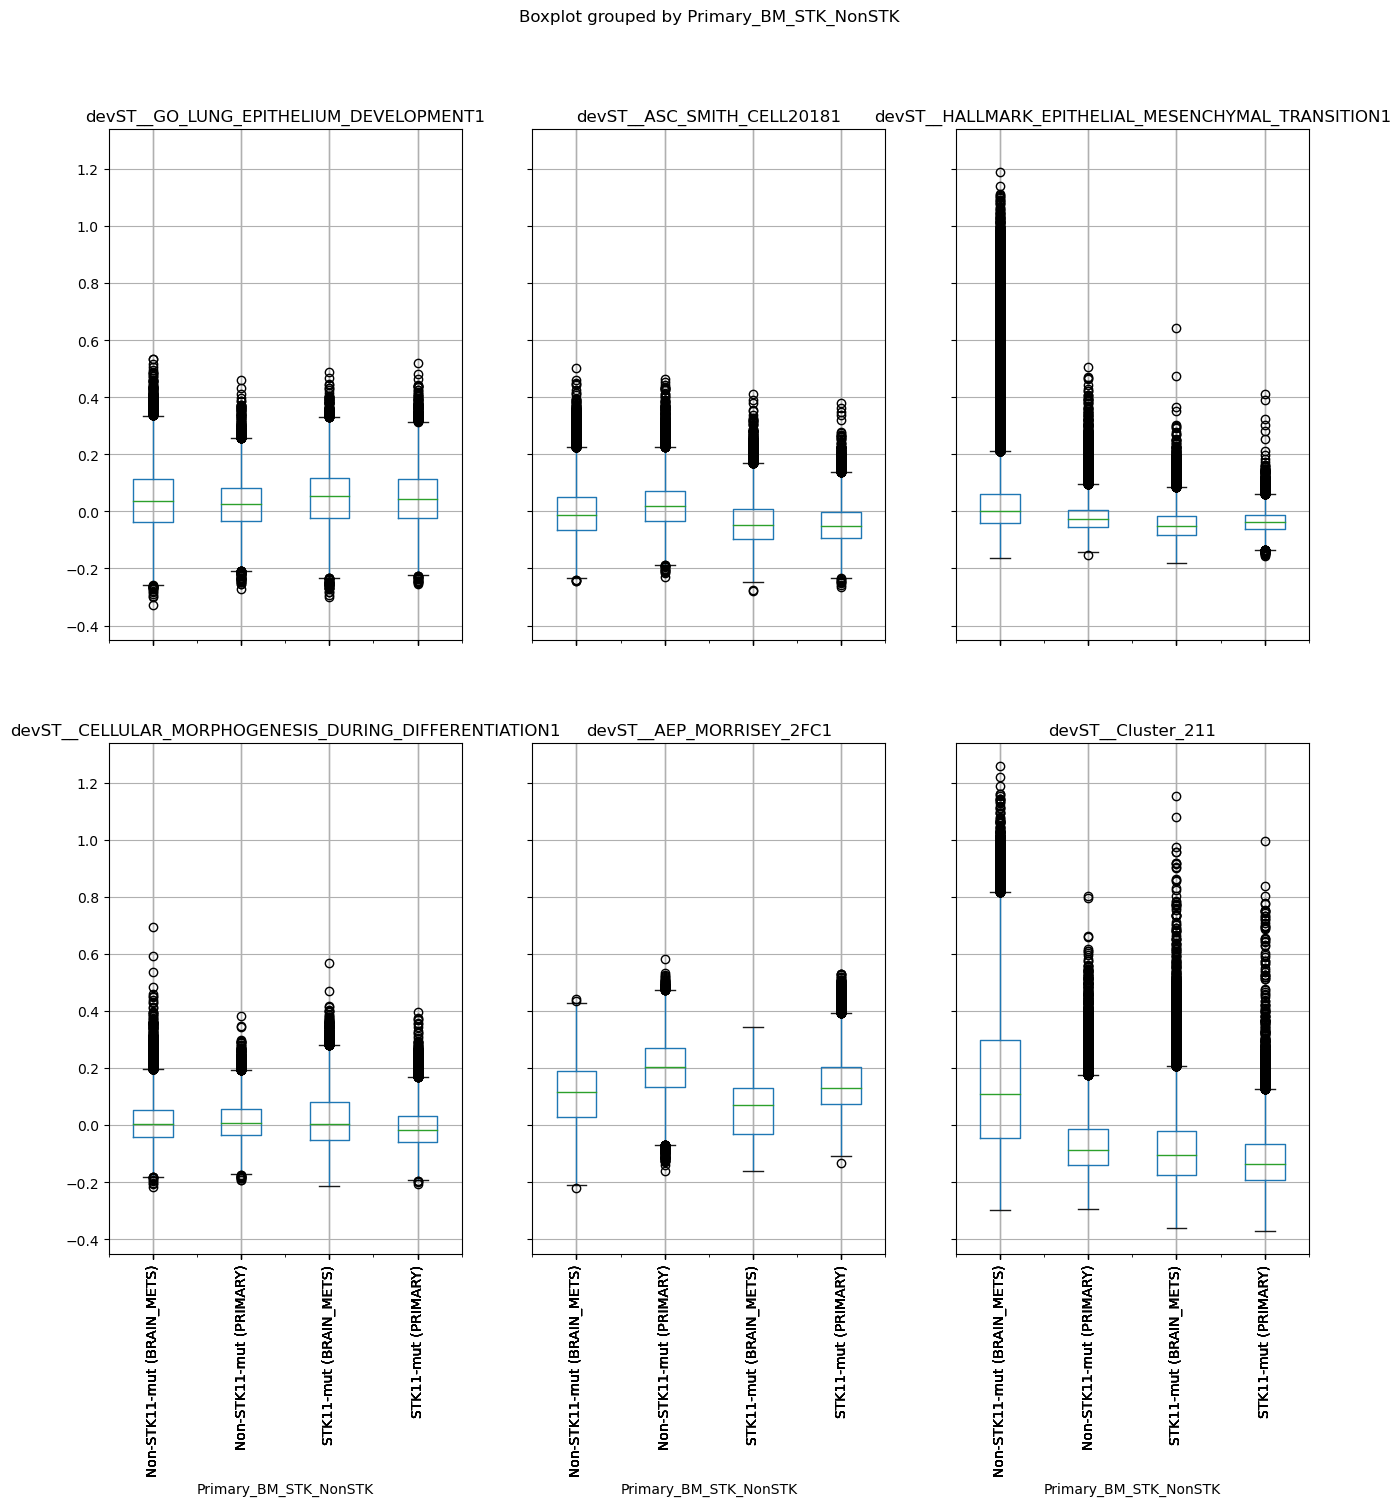

In [93]:
boxplot = tumor_only.obs.boxplot(column=['devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               'devST__ASC_SMITH_CELL20181', 
                               'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               'devST__AEP_MORRISEY_2FC1', 
                               'devST__Cluster_211'], by='Primary_BM_STK_NonSTK',layout=(2, 3),
                                 rot=90,figsize = (15,15)
                     )

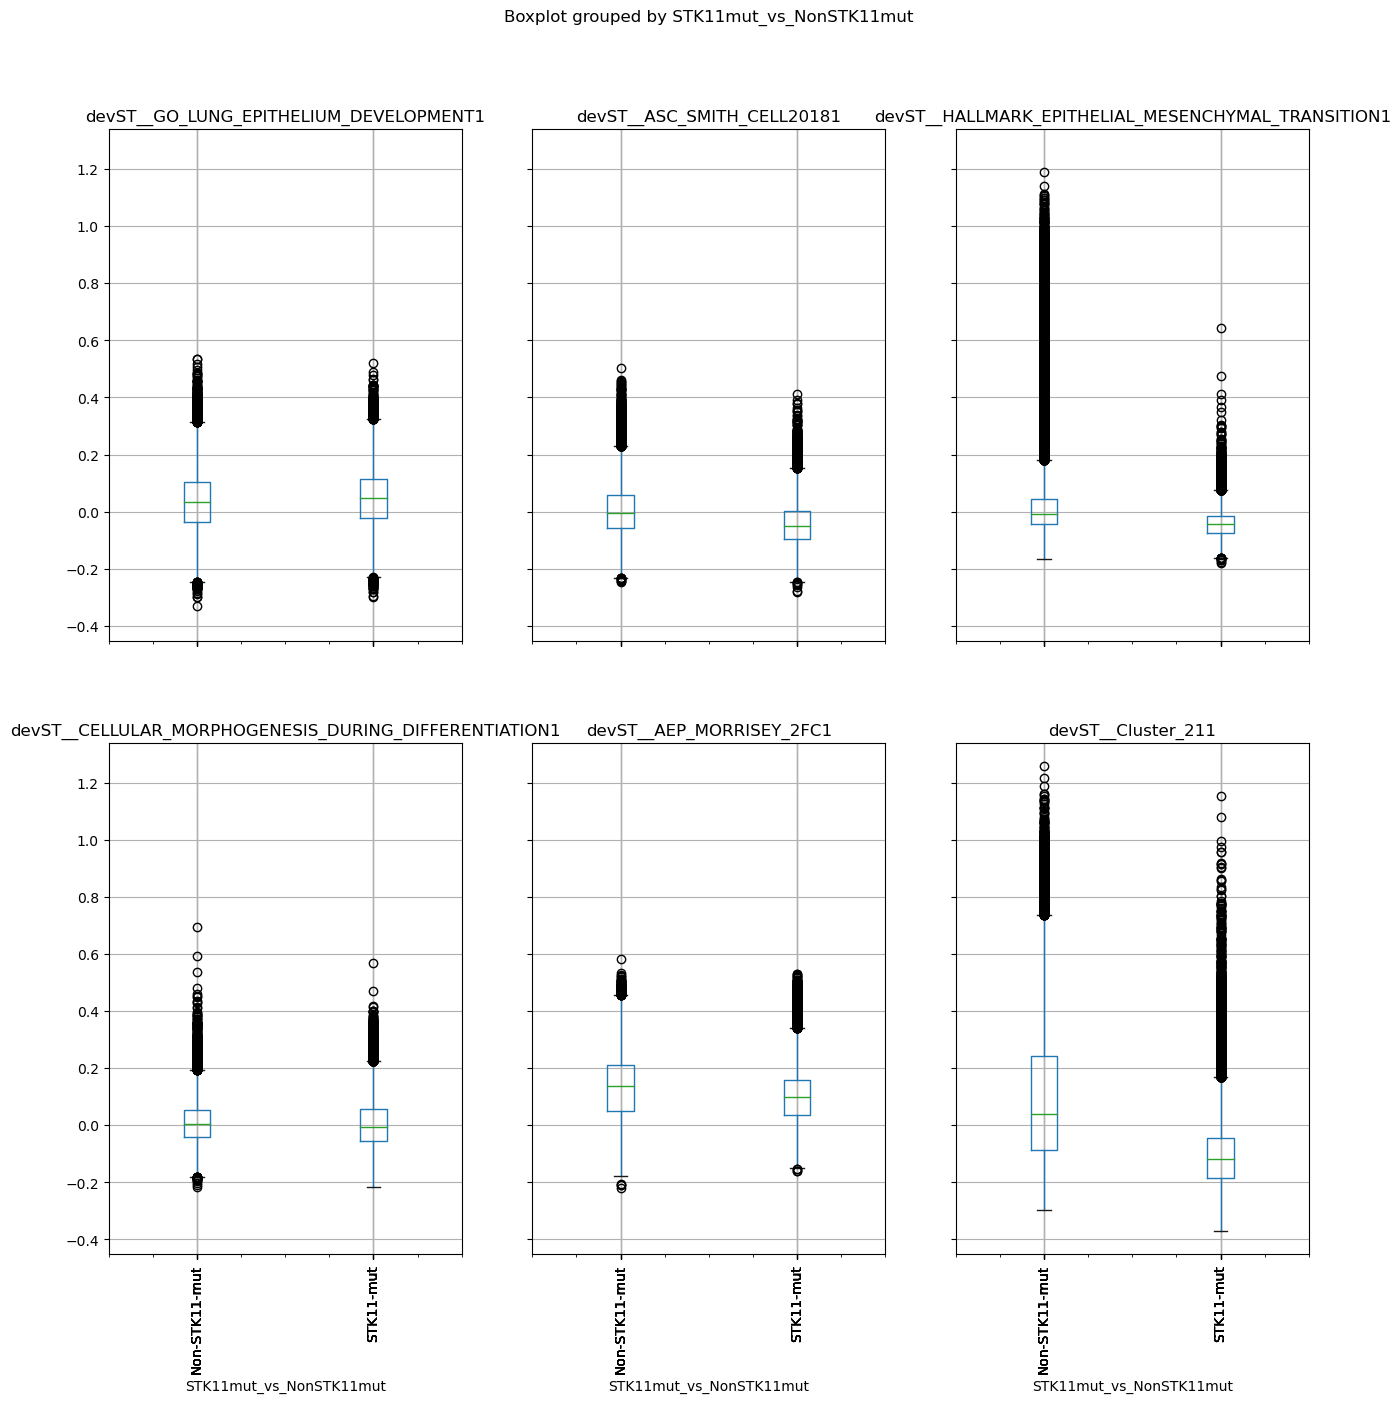

In [94]:
boxplot = tumor_only.obs.boxplot(column=['devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               'devST__ASC_SMITH_CELL20181', 
                               'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               'devST__AEP_MORRISEY_2FC1', 
                               'devST__Cluster_211'], by='STK11mut_vs_NonSTK11mut',layout=(2, 3),
                                 rot=90,figsize = (15,15)
                     )

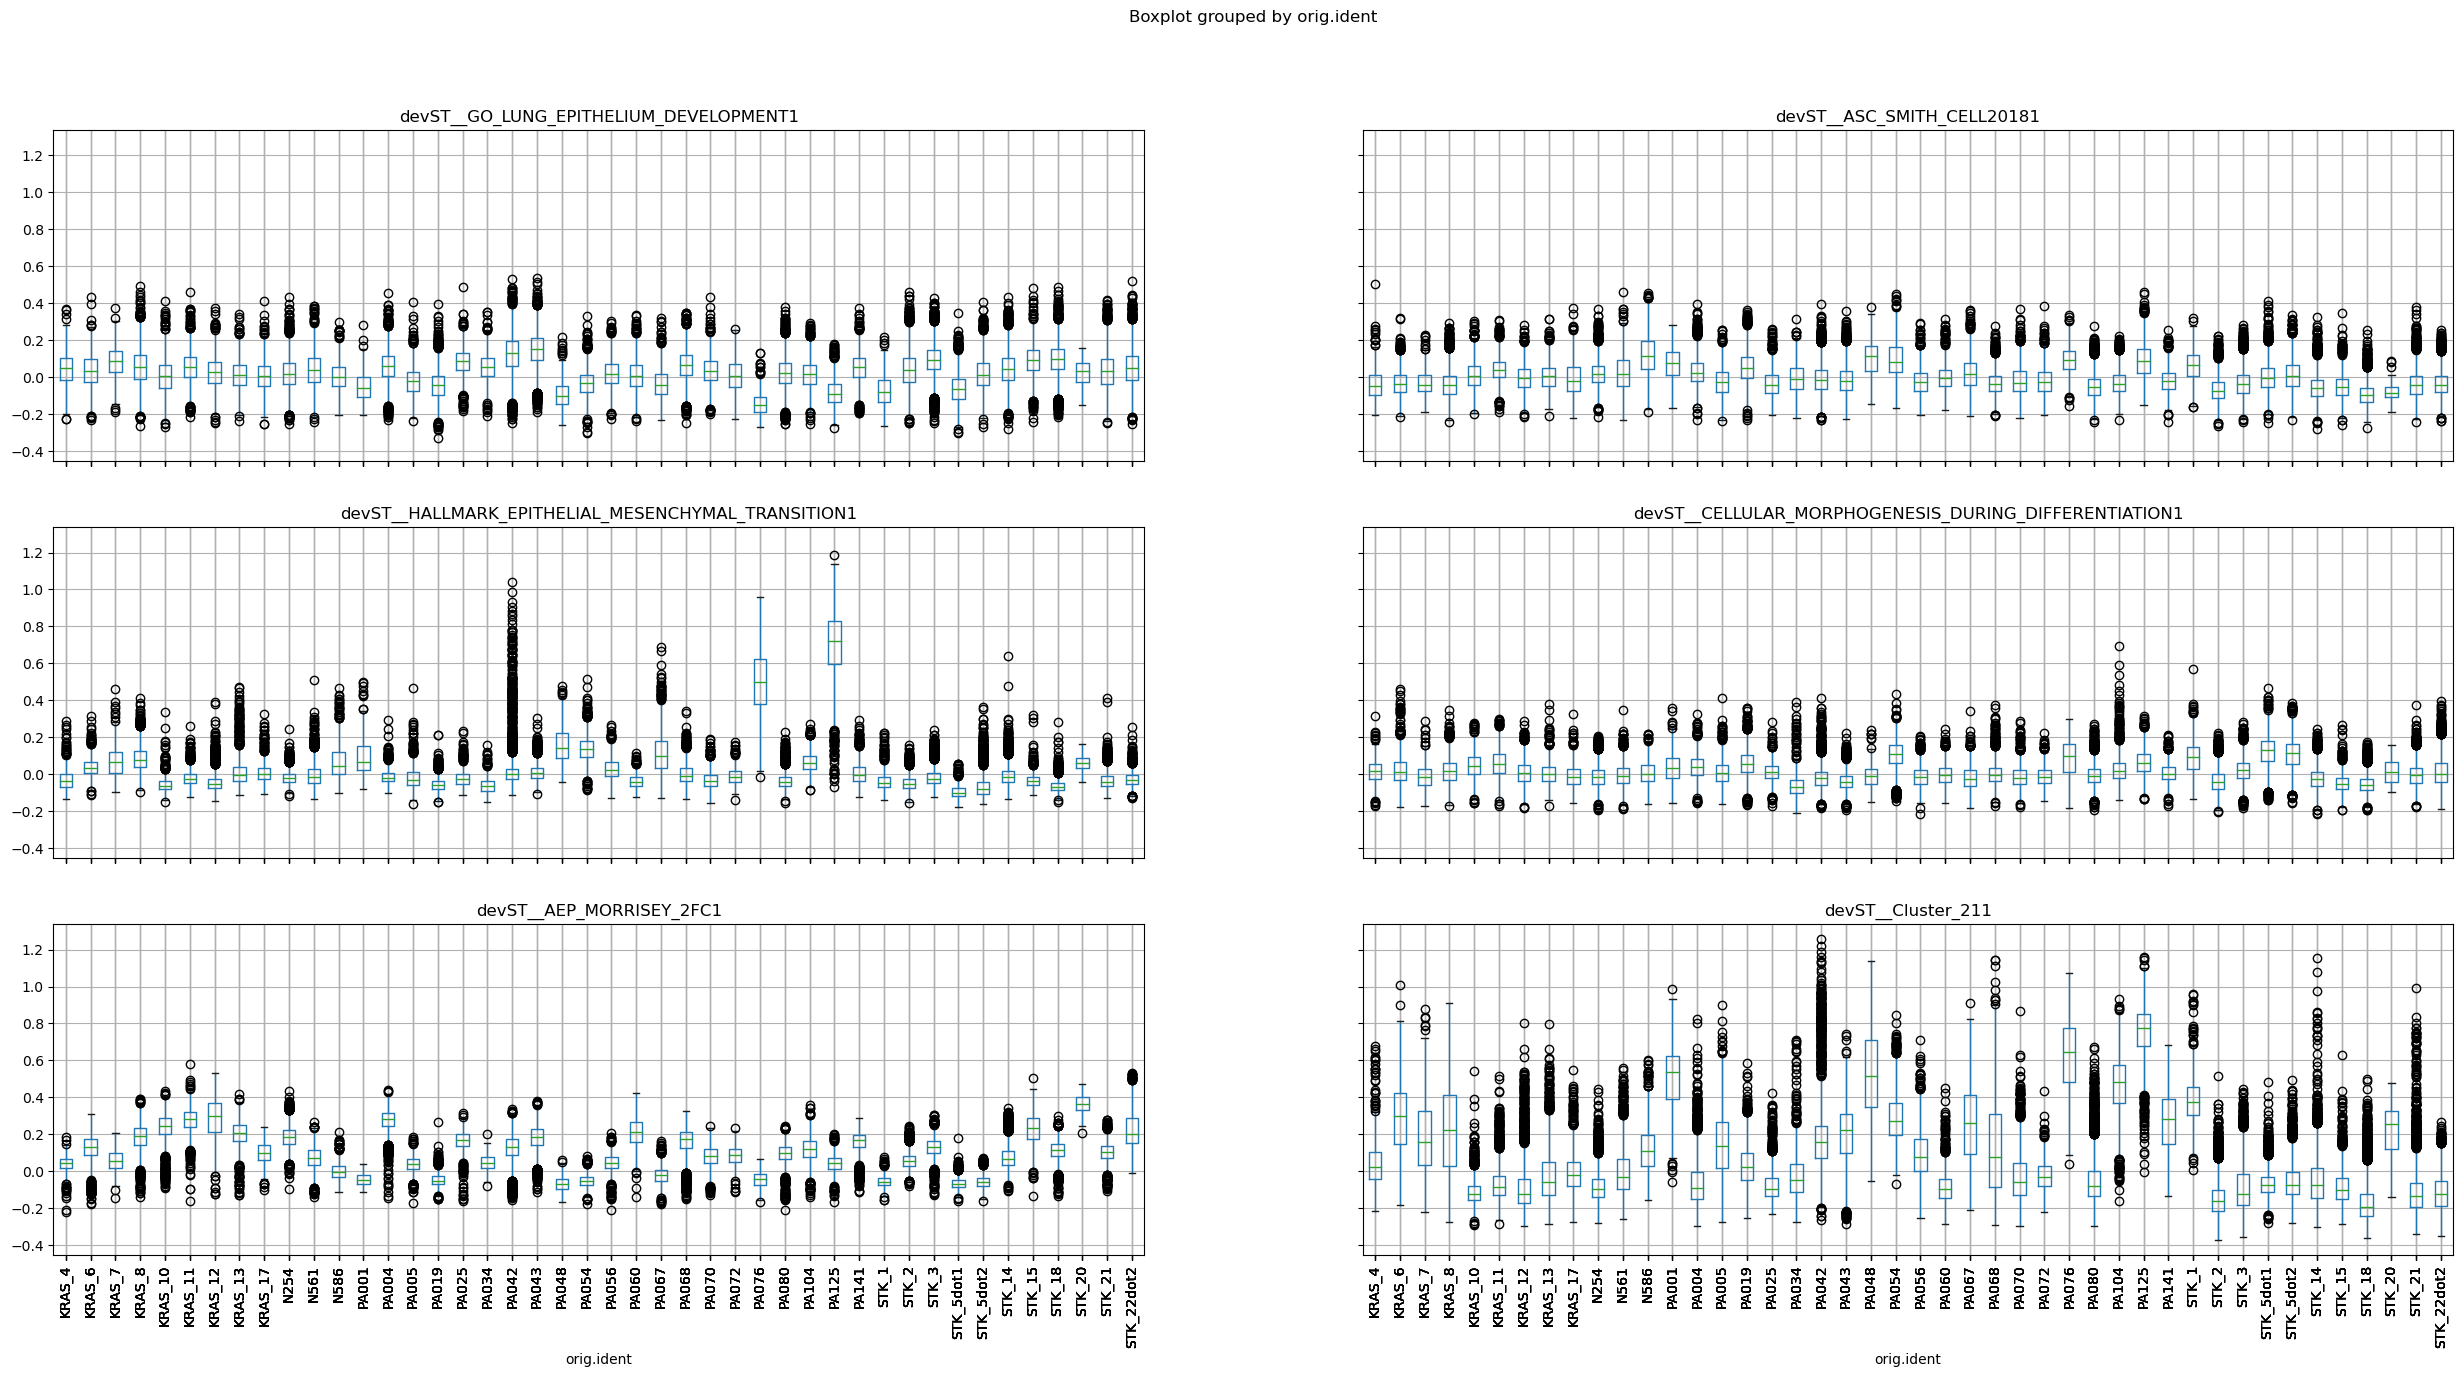

In [95]:
dev = tumor_only.obs.boxplot(column=['devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               'devST__ASC_SMITH_CELL20181', 
                               'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               'devST__AEP_MORRISEY_2FC1', 
                               'devST__Cluster_211'], by='orig.ident',layout=(3, 2),
                                 rot=90,figsize = (30,15)
                     )

In [96]:
order = list(tumor_only.obs.drop_duplicates(
    subset = 'orig.ident').sort_values('Primary_BM_STK_NonSTK')[
    'orig.ident'])

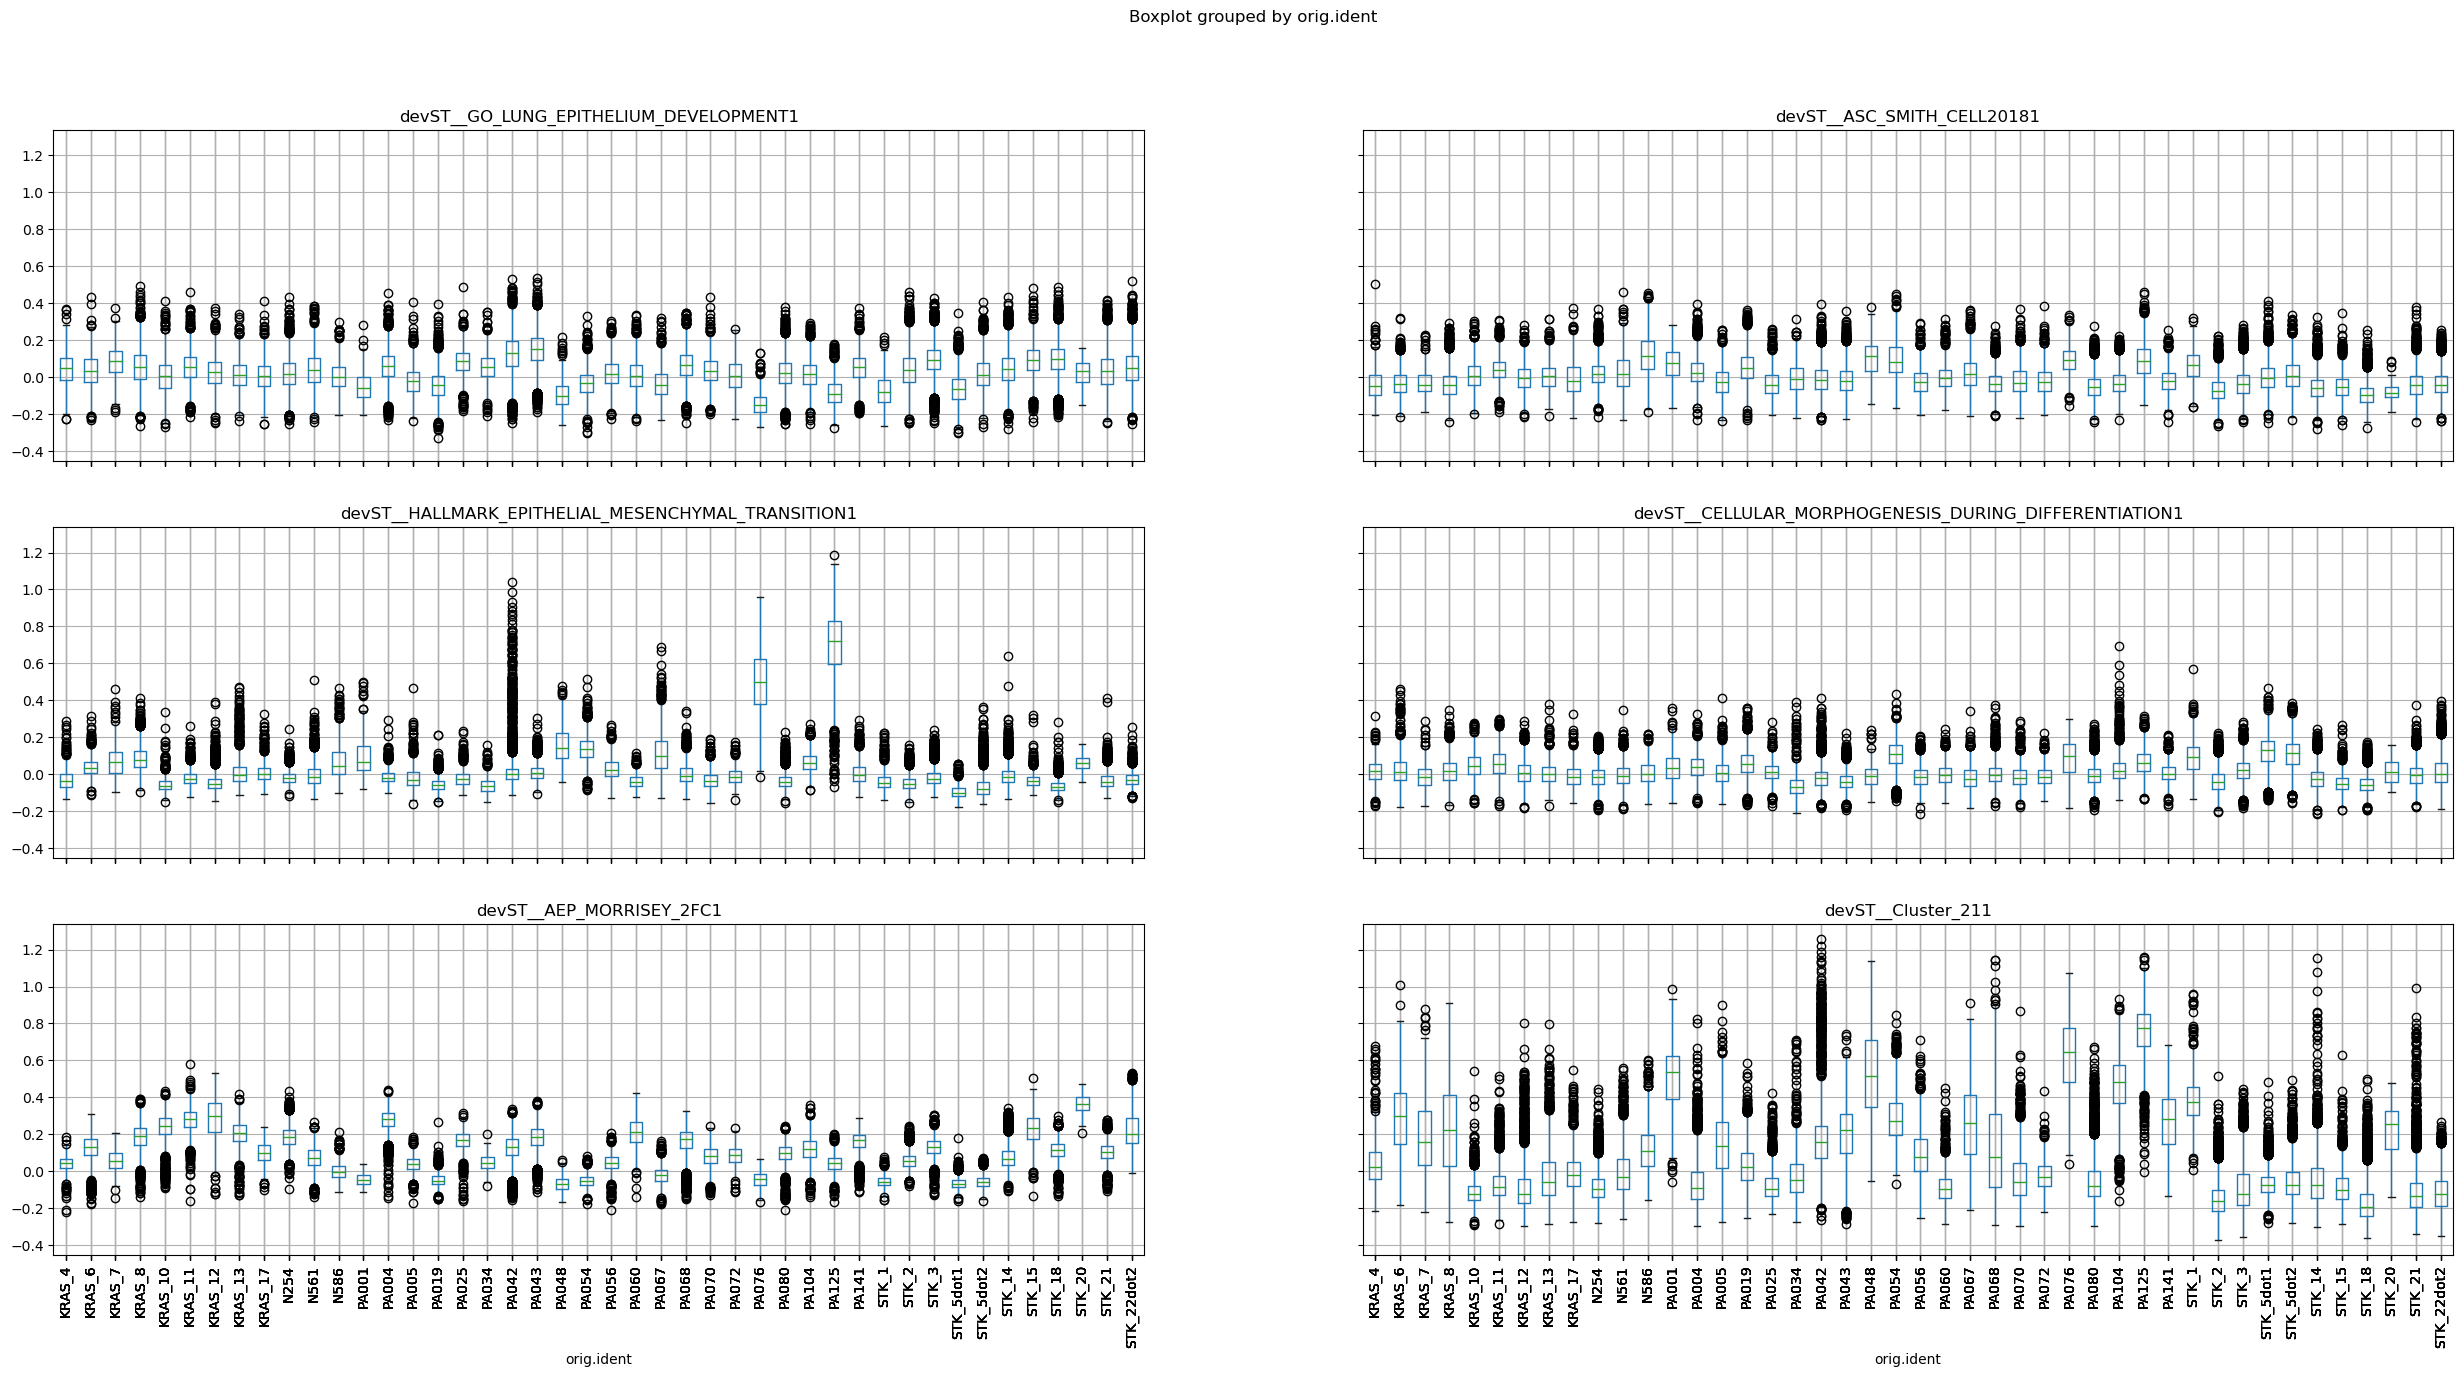

In [97]:
dev = tumor_only.obs.boxplot(column=['devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               'devST__ASC_SMITH_CELL20181', 
                               'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               'devST__AEP_MORRISEY_2FC1', 
                               'devST__Cluster_211'], by='orig.ident',layout=(3, 2),
                                 rot=90,figsize = (30,15)
                     )

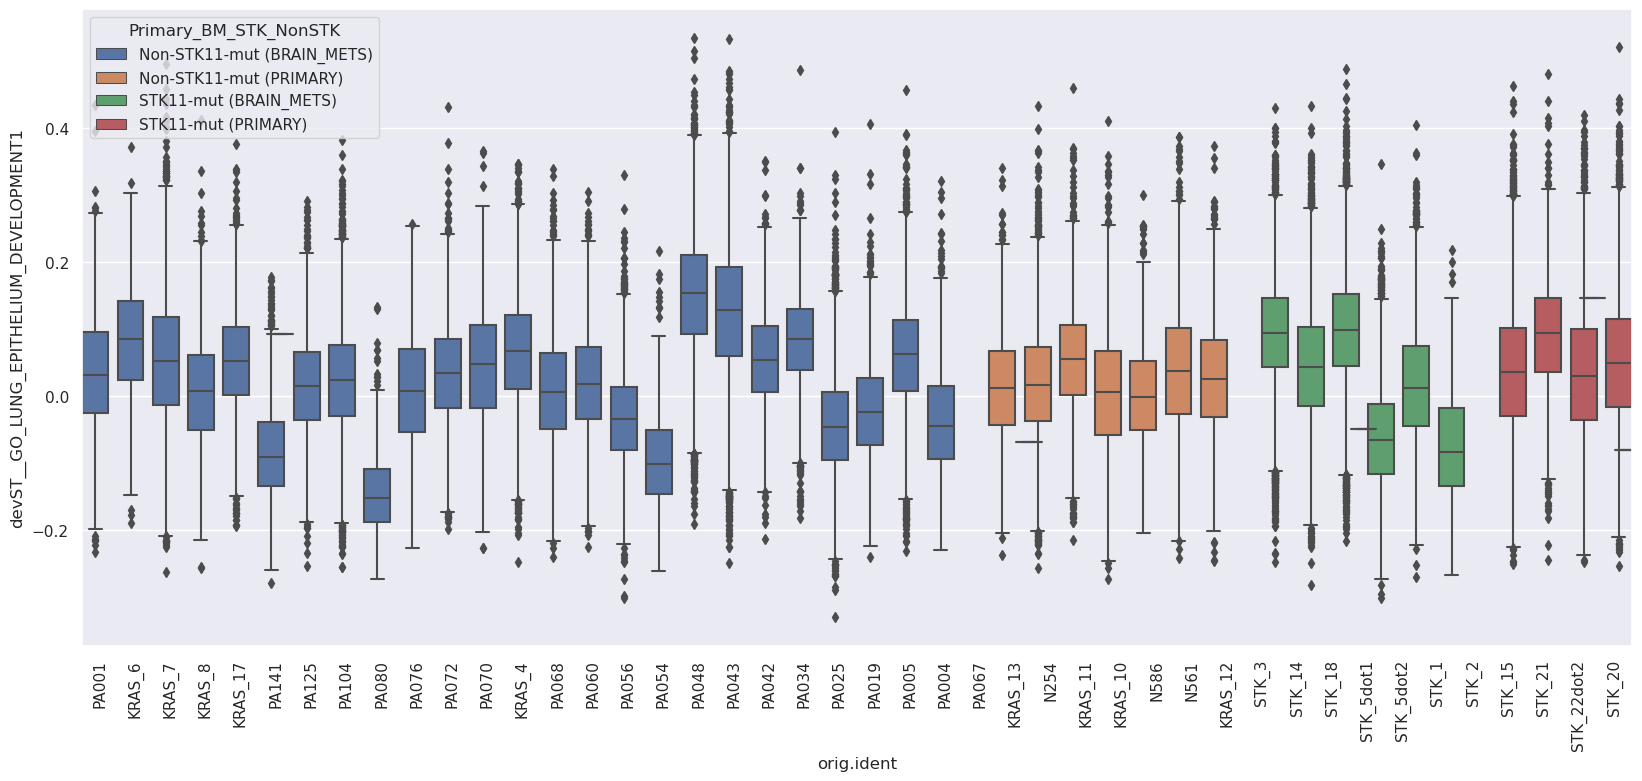

In [98]:
# import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})

ax = sns.boxplot(x="orig.ident", 
                 y='devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                 data =tumor_only.obs, order = order, 
                 hue = 'Primary_BM_STK_NonSTK',width=3
                 
            )
a = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


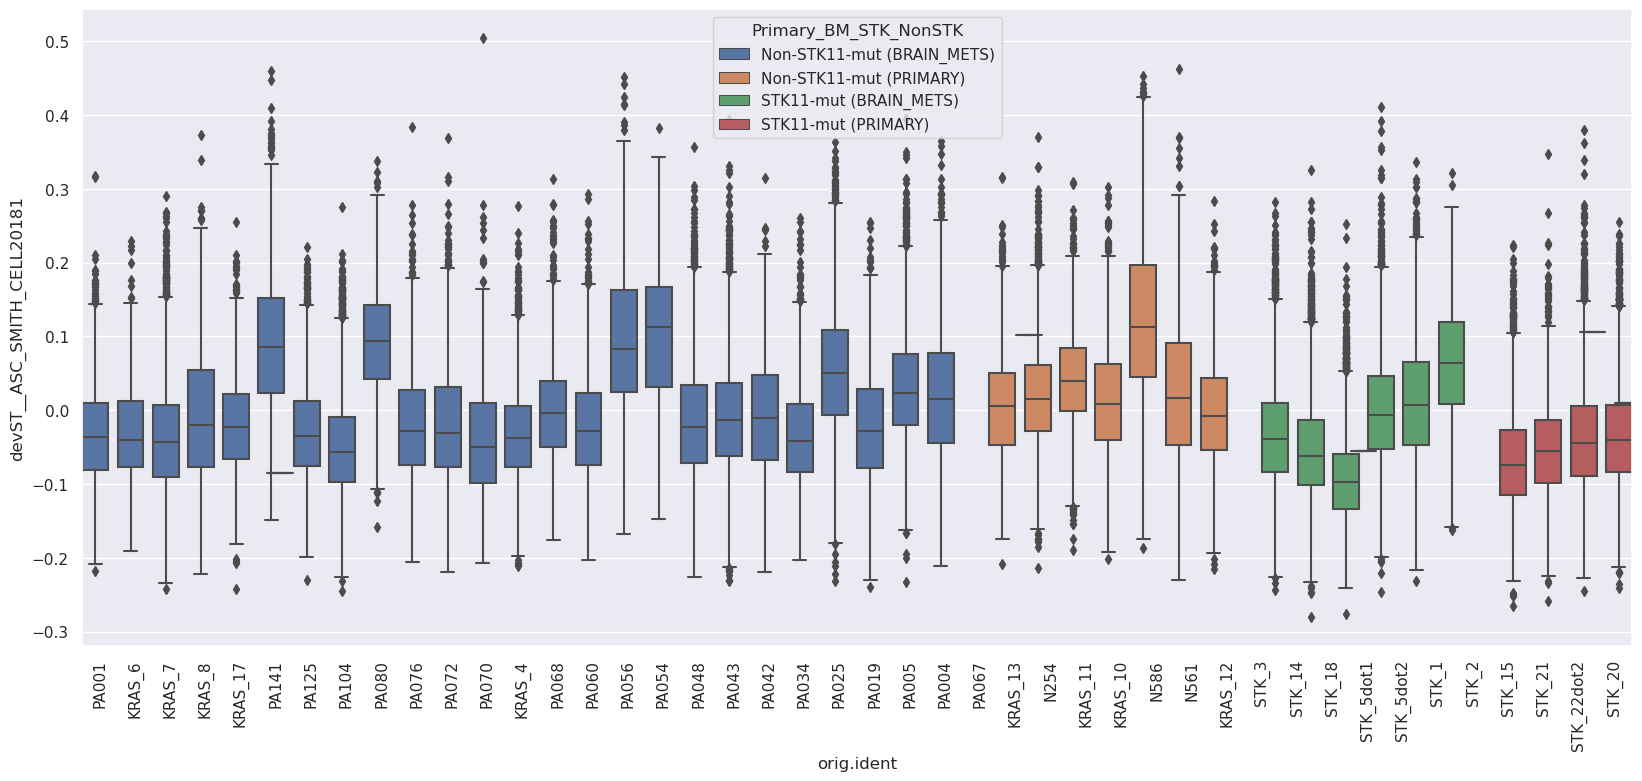

In [99]:
# import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})

ax = sns.boxplot(x="orig.ident", 
                 y='devST__ASC_SMITH_CELL20181', 
                 data =tumor_only.obs, order = order, 
                 hue = 'Primary_BM_STK_NonSTK',width=3
                 
            )
a = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

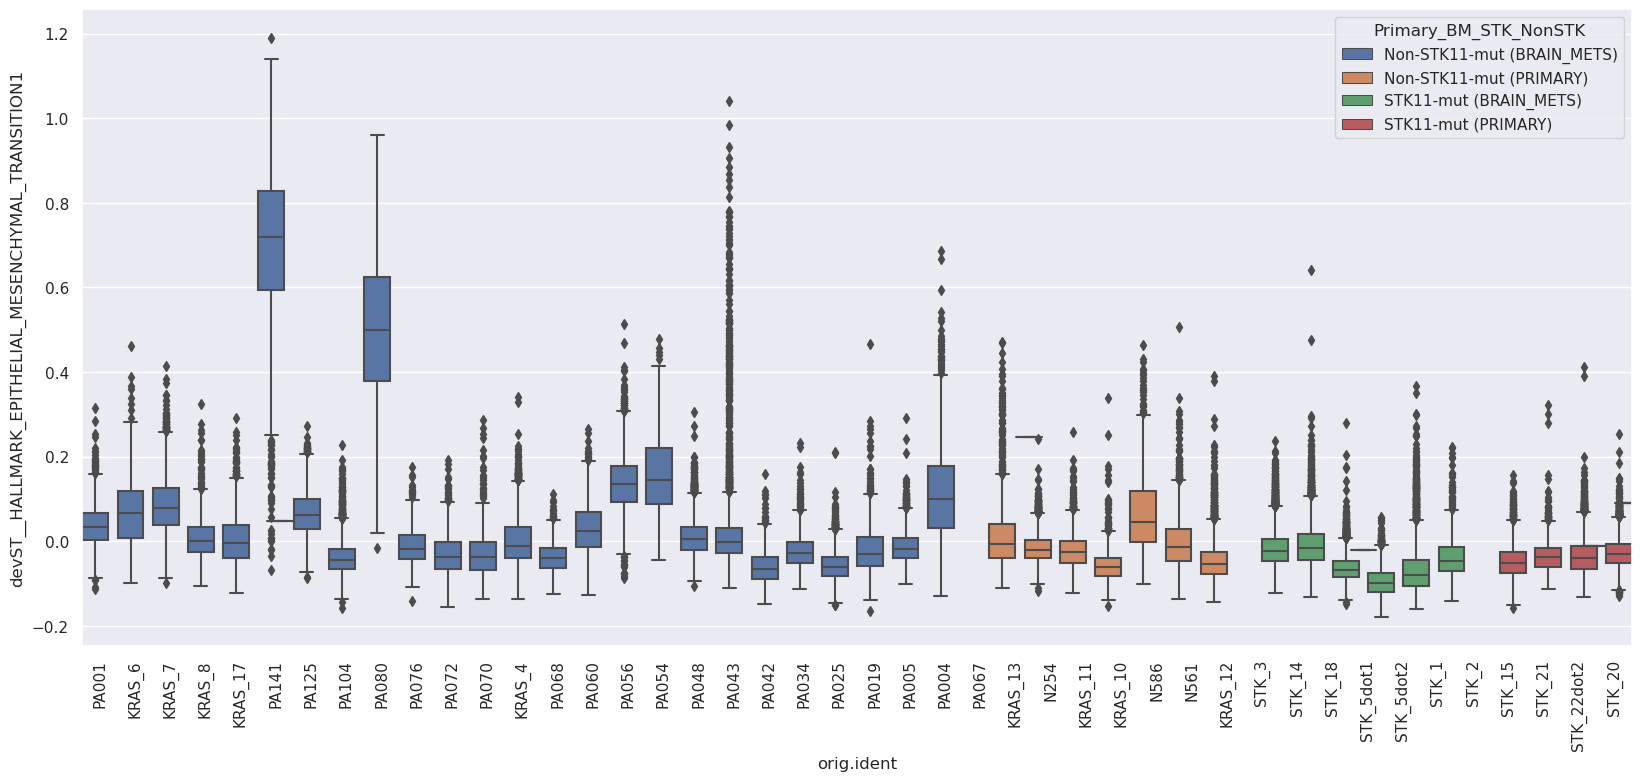

In [100]:
# import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})

ax = sns.boxplot(x="orig.ident", 
                 y='devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                 data =tumor_only.obs, order = order, 
                 hue = 'Primary_BM_STK_NonSTK',width=3
                 
            )
a = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

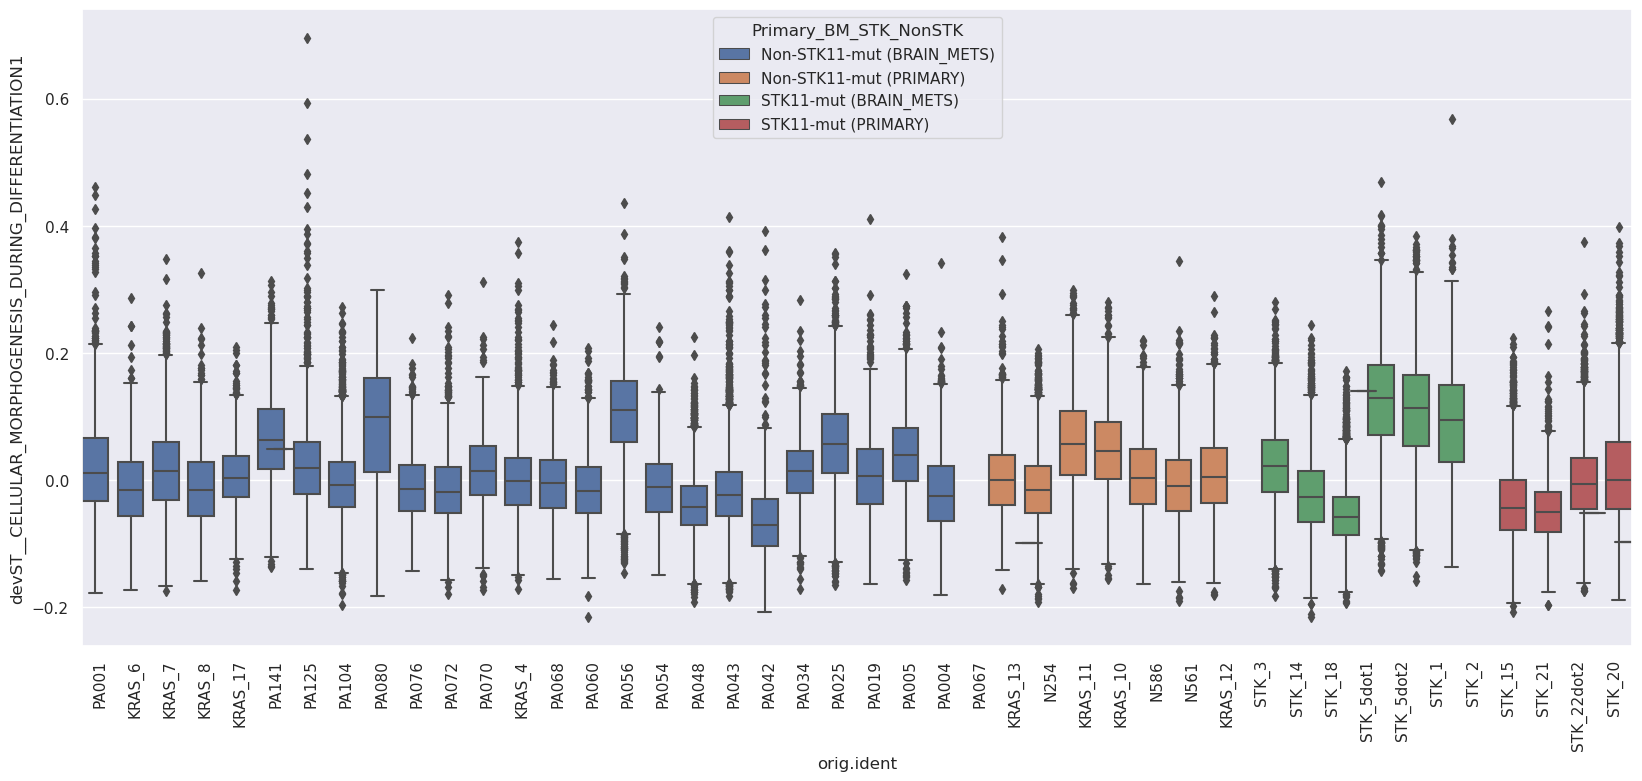

In [101]:
# import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})

ax = sns.boxplot(x="orig.ident", 
                 y='devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                 data =tumor_only.obs, order = order, 
                 hue = 'Primary_BM_STK_NonSTK',width=3
                 
            )
a = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

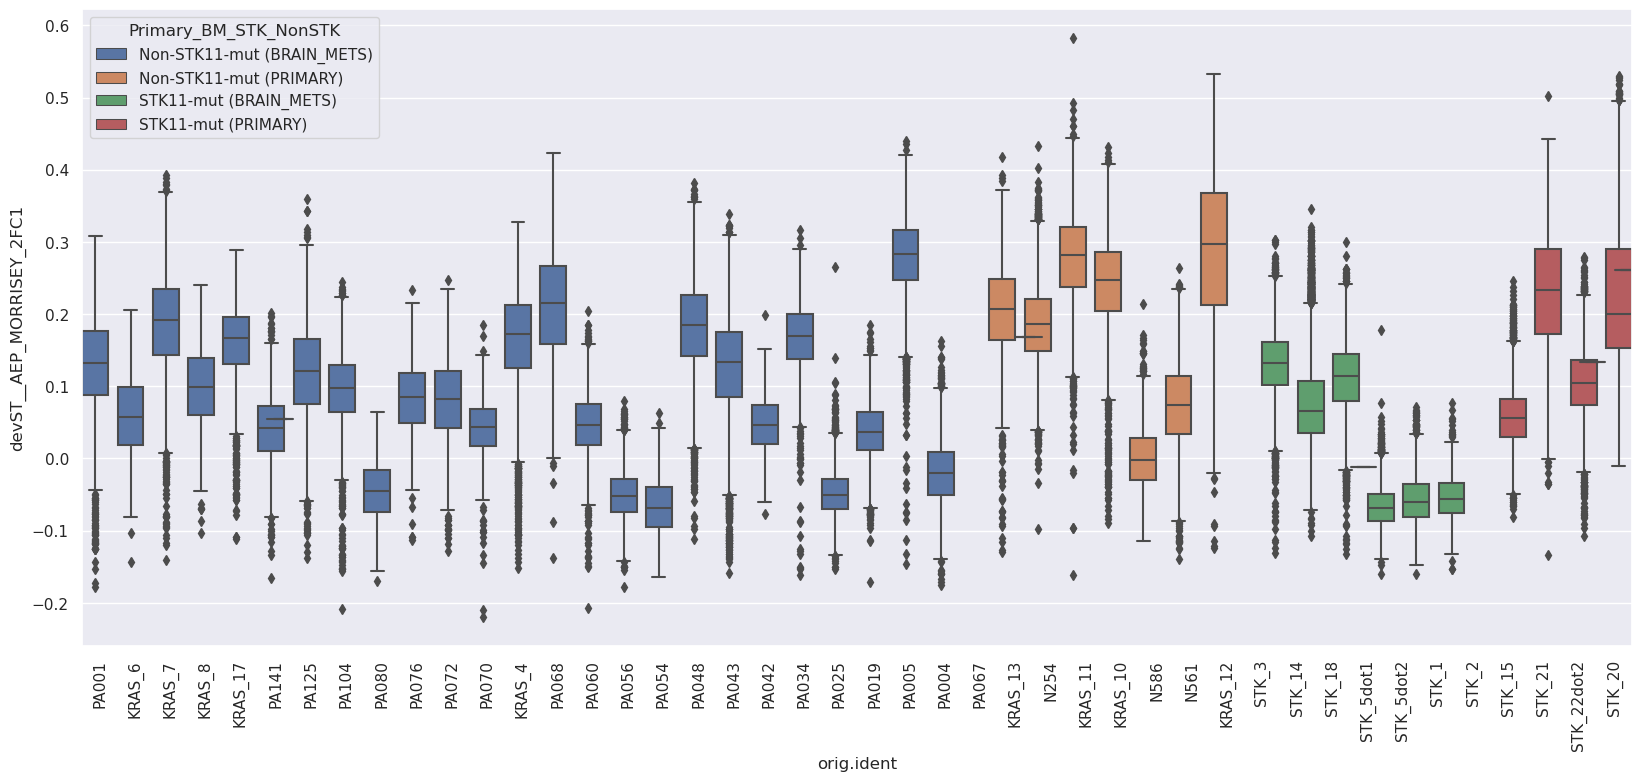

In [102]:
# import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})

ax = sns.boxplot(x="orig.ident", 
                 y='devST__AEP_MORRISEY_2FC1', 
                 data =tumor_only.obs, order = order, 
                 hue = 'Primary_BM_STK_NonSTK',width=3
                 
            )
a = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

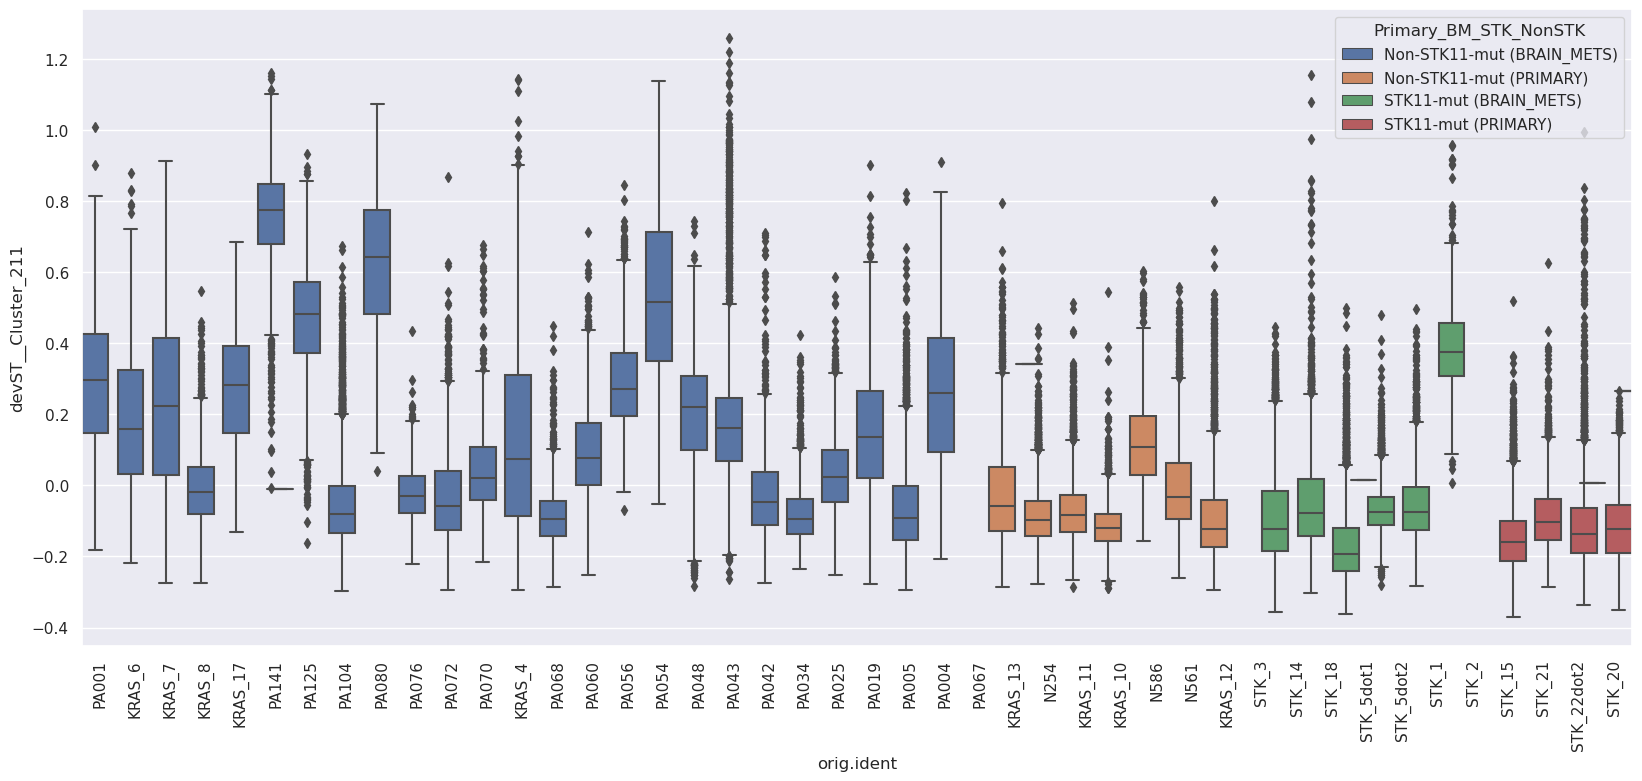

In [103]:
# import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})

ax = sns.boxplot(x="orig.ident", 
                 y='devST__Cluster_211', 
                 data =tumor_only.obs, order = order, 
                 hue = 'Primary_BM_STK_NonSTK',width=3
                 
            )
a = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [107]:
set(tumor_only.obs["Primary_vs_BM"])

{'BRAIN_METS', 'PRIMARY'}

devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1
Ttest_indResult(statistic=-11.980330555828347, pvalue=4.6708427425175936e-33)
devST__ASC_SMITH_CELL20181
Ttest_indResult(statistic=-0.817142259759322, pvalue=0.4138484817185504)
devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1
Ttest_indResult(statistic=-61.80281769064877, pvalue=0.0)
devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1
Ttest_indResult(statistic=-30.643924250352015, pvalue=1.4584224112767601e-205)
devST__AEP_MORRISEY_2FC1
Ttest_indResult(statistic=128.9085976200981, pvalue=0.0)
devST__Cluster_211
Ttest_indResult(statistic=-144.12302858991674, pvalue=0.0)


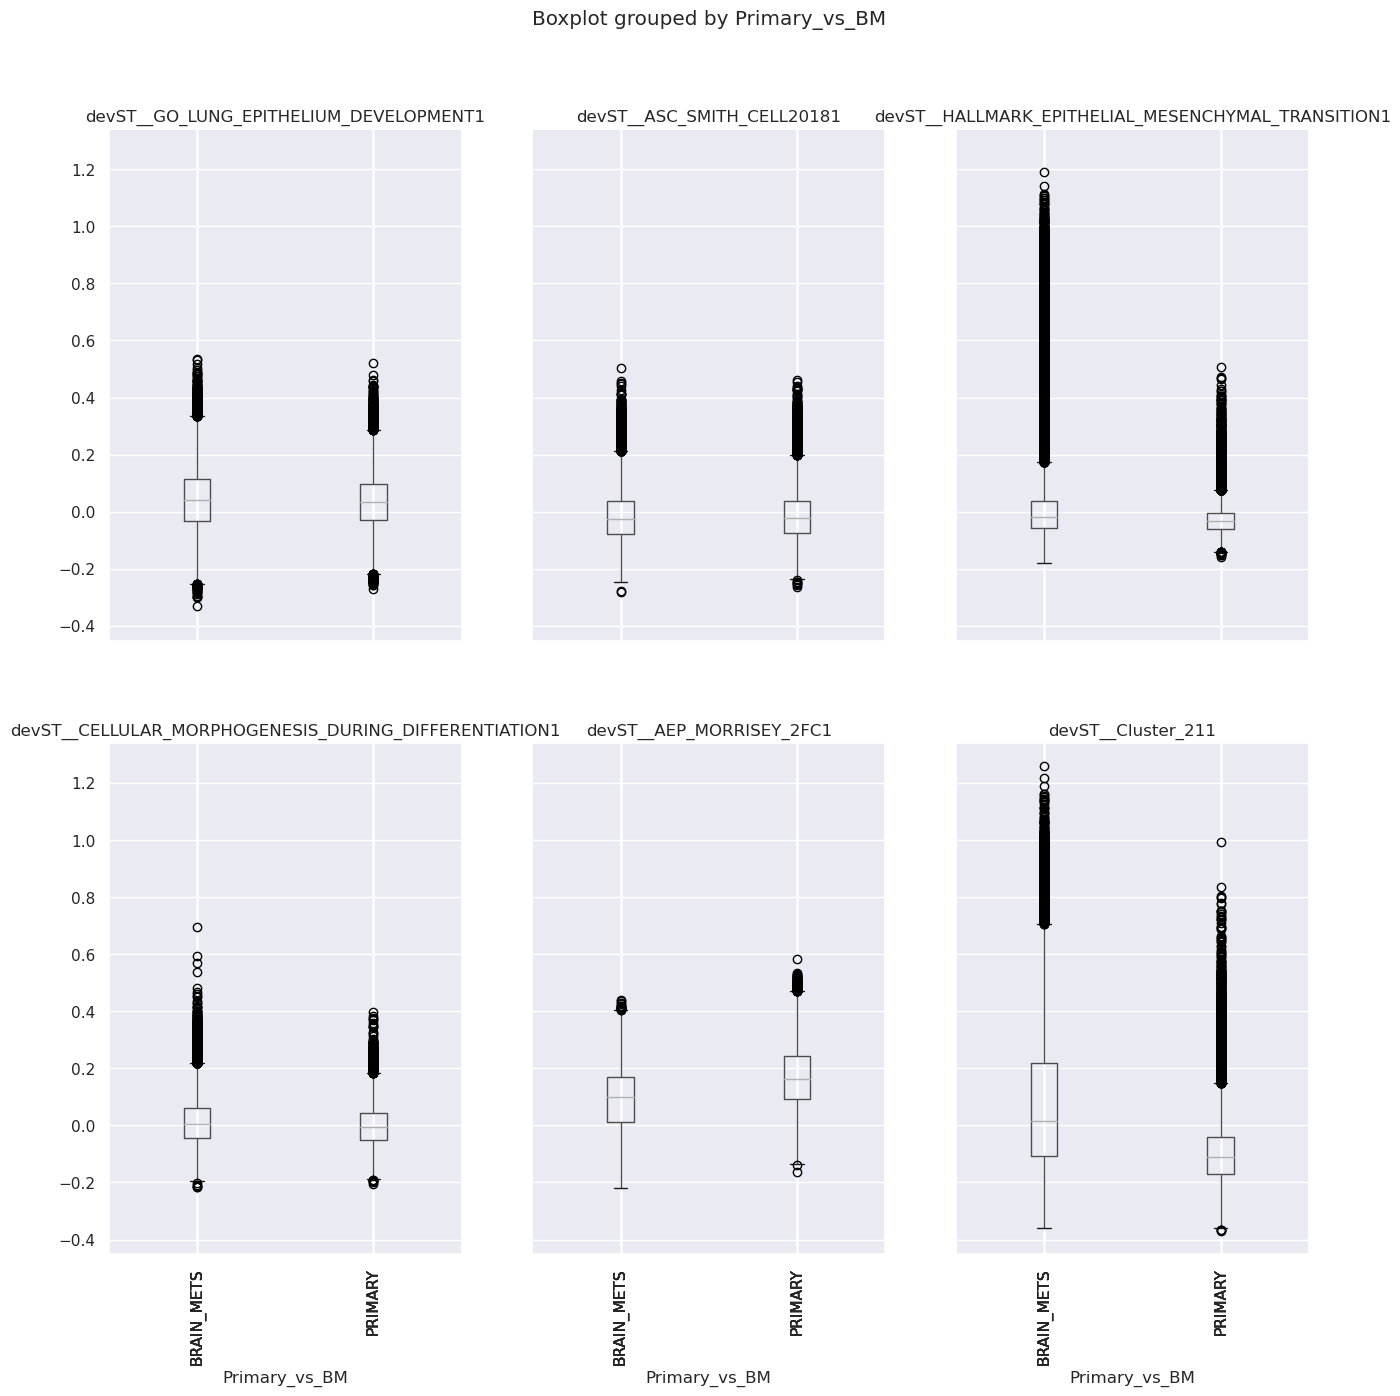

In [109]:
from scipy.stats import ttest_ind

tumor_only.obs.boxplot(column=['devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               'devST__ASC_SMITH_CELL20181', 
                               'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               'devST__AEP_MORRISEY_2FC1', 
                               'devST__Cluster_211'], by='Primary_vs_BM',layout=(2, 3),
                                 rot=90,figsize = (15,15)
                     )

cat1 = tumor_only.obs[tumor_only.obs['Primary_vs_BM']=='PRIMARY']
cat2 = tumor_only.obs[tumor_only.obs['Primary_vs_BM']=='BRAIN_METS']

for x in ['devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               'devST__ASC_SMITH_CELL20181', 
                               'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               'devST__AEP_MORRISEY_2FC1', 
                               'devST__Cluster_211']:
    print(x)
    print(ttest_ind(cat1[x], cat2[x]))


devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1
Ttest_indResult(statistic=-17.727184118162118, pvalue=3.071027414017449e-70)
devST__ASC_SMITH_CELL20181
Ttest_indResult(statistic=103.21687193406184, pvalue=0.0)
devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1
Ttest_indResult(statistic=108.6815410333899, pvalue=0.0)
devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1
Ttest_indResult(statistic=9.060763091888088, pvalue=1.3109636621966943e-19)
devST__AEP_MORRISEY_2FC1
Ttest_indResult(statistic=53.40321817775125, pvalue=0.0)
devST__Cluster_211
Ttest_indResult(statistic=182.73304027741509, pvalue=0.0)


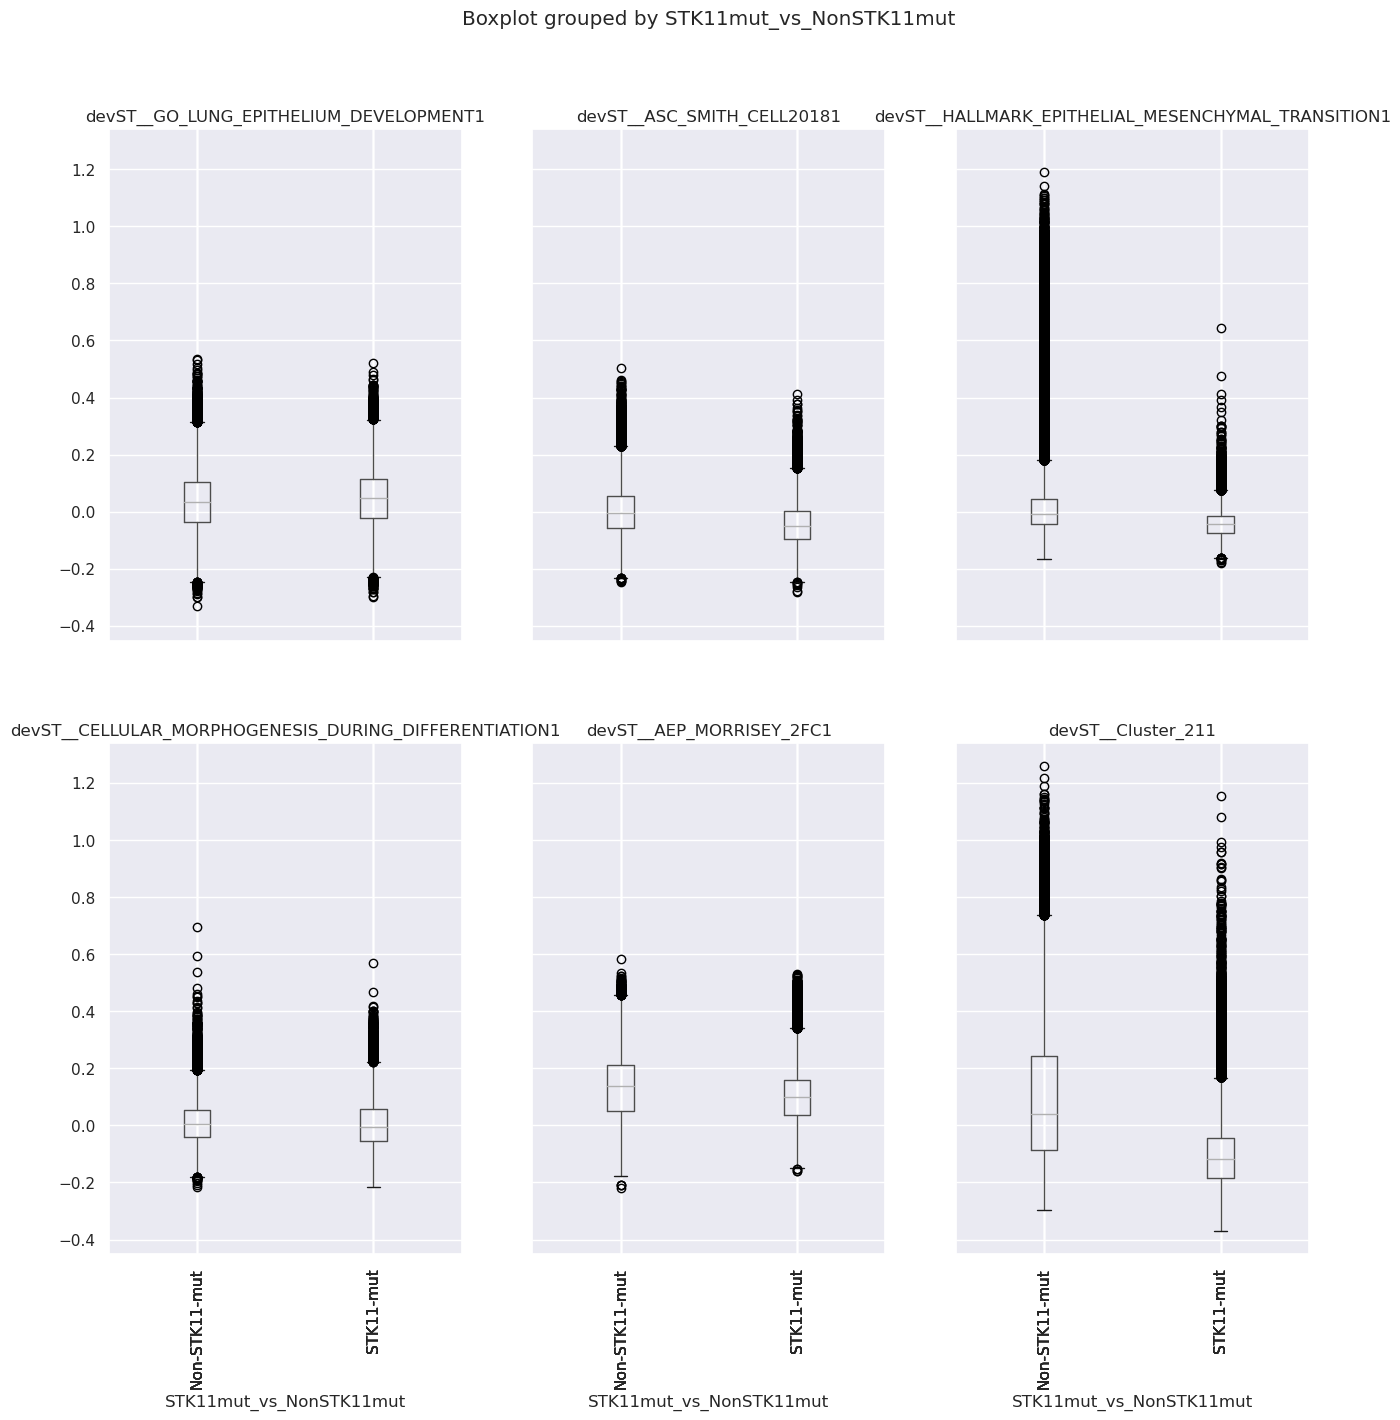

In [106]:
from scipy.stats import ttest_ind

tumor_only.obs.boxplot(column=['devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               'devST__ASC_SMITH_CELL20181', 
                               'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               'devST__AEP_MORRISEY_2FC1', 
                               'devST__Cluster_211'], by='STK11mut_vs_NonSTK11mut',layout=(2, 3),
                                 rot=90,figsize = (15,15)
                     )



cat1 = tumor_only.obs[tumor_only.obs['STK11mut_vs_NonSTK11mut']=='Non-STK11-mut']
cat2 = tumor_only.obs[tumor_only.obs['STK11mut_vs_NonSTK11mut']=='STK11-mut']

for x in ['devST__GO_LUNG_EPITHELIUM_DEVELOPMENT1', 
                               'devST__ASC_SMITH_CELL20181', 
                               'devST__HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION1', 
                               'devST__CELLULAR_MORPHOGENESIS_DURING_DIFFERENTIATION1', 
                               'devST__AEP_MORRISEY_2FC1', 
                               'devST__Cluster_211']:
    print(x)
    print(ttest_ind(cat1[x], cat2[x]))

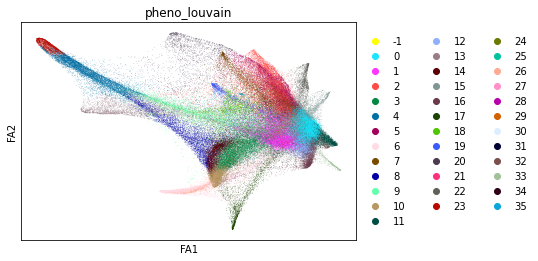

In [16]:
sc.pl.draw_graph(integrated_obj, color=["pheno_louvain"])

In [17]:
integrated_obj.obsp

PairwiseArrays with keys: pheno_jaccard_ig, distances, connectivities

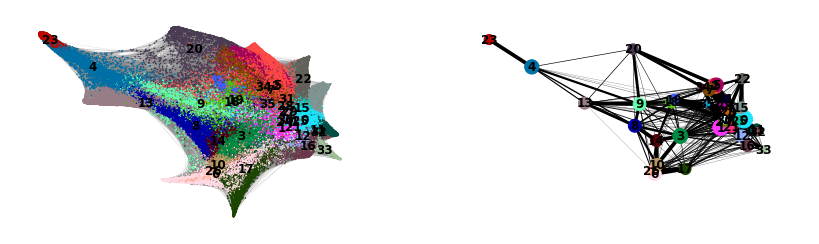

In [18]:
sc.tl.paga(integrated_obj, groups='pheno_louvain')
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=0, frameon=False, edges=True)

In [19]:
#sc.external.tl.phenograph(integrated_obj, clustering_algo = "louvain", directed = True)

In [20]:
integrated_obj.obs['pheno_louvain']

Tumor_PA001_GCGAGAAGTACTTAGC-1     6
Tumor_PA001_TCGGTAAAGGCAAAGA-1    18
Tumor_PA001_CTCTAATCATGAGCGA-1    19
Tumor_PA001_CTTTGCGAGACTGTAA-1    19
Tumor_PA001_GTTACAGTCCAGAGGA-1     8
                                  ..
Control_TCCATGCAGCTCGACC-1_6       0
Control_TGCTTGCGTTGGAGAC-1_6       2
Control_ACTGATGGTCTTGAGT-1_6       0
Control_TGCTCCAAGACATACA-1_6      10
Control_TTACGTTTCACGGACC-1_6      22
Name: pheno_louvain, Length: 151395, dtype: category
Categories (37, int64): [-1, 0, 1, 2, ..., 32, 33, 34, 35]

In [21]:
sc.pp.neighbors(integrated_obj)
sc.tl.paga(integrated_obj, groups='pheno_louvain')


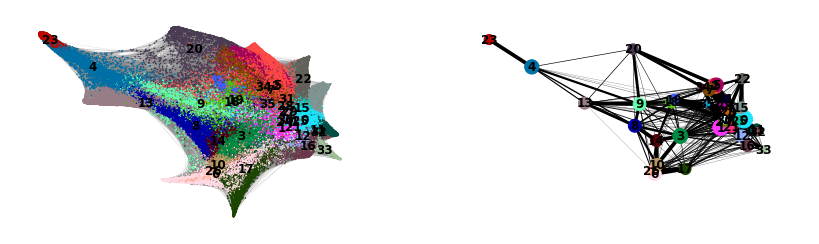

In [22]:
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=0, frameon=False, edges=True)

In [23]:
integrated_obj.obs["cell_type_fine"] 

Tumor_PA001_GCGAGAAGTACTTAGC-1              NaN
Tumor_PA001_TCGGTAAAGGCAAAGA-1              NaN
Tumor_PA001_CTCTAATCATGAGCGA-1              NaN
Tumor_PA001_CTTTGCGAGACTGTAA-1              NaN
Tumor_PA001_GTTACAGTCCAGAGGA-1              NaN
                                      ...      
Control_TCCATGCAGCTCGACC-1_6                AT2
Control_TGCTTGCGTTGGAGAC-1_6                AT1
Control_ACTGATGGTCTTGAGT-1_6                AT2
Control_TGCTCCAAGACATACA-1_6      AT2 (high MT)
Control_TTACGTTTCACGGACC-1_6                AT1
Name: cell_type_fine, Length: 151395, dtype: category
Categories (8, object): ['AT1', 'AT2', 'AT2 (high MT)', 'Airway basal', 'Airway ciliated', 'Airway club', 'Airway goblet', 'NE']

In [24]:
integrated_obj.obs['cell_type_fine']

Tumor_PA001_GCGAGAAGTACTTAGC-1              NaN
Tumor_PA001_TCGGTAAAGGCAAAGA-1              NaN
Tumor_PA001_CTCTAATCATGAGCGA-1              NaN
Tumor_PA001_CTTTGCGAGACTGTAA-1              NaN
Tumor_PA001_GTTACAGTCCAGAGGA-1              NaN
                                      ...      
Control_TCCATGCAGCTCGACC-1_6                AT2
Control_TGCTTGCGTTGGAGAC-1_6                AT1
Control_ACTGATGGTCTTGAGT-1_6                AT2
Control_TGCTCCAAGACATACA-1_6      AT2 (high MT)
Control_TTACGTTTCACGGACC-1_6                AT1
Name: cell_type_fine, Length: 151395, dtype: category
Categories (8, object): ['AT1', 'AT2', 'AT2 (high MT)', 'Airway basal', 'Airway ciliated', 'Airway club', 'Airway goblet', 'NE']

In [25]:

"""    object_row = list(x['STK11mut_vs_NonSTK11mut'].value_counts().values)
    object_row.extend(x['Primary_vs_BM'].value_counts().values) 
    #object_row.extend(x['Primary_BM_STK_NonSTK'].value_counts().values) 
    object_row.extend(x['celltype_bped_fine'].value_counts().values) 
    object_row.extend(x['cell_type_fine'].value_counts().values) 
    rows.append(object_row)
    
    labels = list(x['STK11mut_vs_NonSTK11mut'].value_counts().index) 
    labels.extend(x['Primary_vs_BM'].value_counts().index) 
    #labels.extend(x['Primary_BM_STK_NonSTK'].value_counts().index) 
    labels.extend(x['celltype_bped_fine'].value_counts().index) 
    labels.extend(x['cell_type_fine'].value_counts().index) 
df = pd.DataFrame(rows, columns=labels)

"""



"    object_row = list(x['STK11mut_vs_NonSTK11mut'].value_counts().values)\n    object_row.extend(x['Primary_vs_BM'].value_counts().values) \n    #object_row.extend(x['Primary_BM_STK_NonSTK'].value_counts().values) \n    object_row.extend(x['celltype_bped_fine'].value_counts().values) \n    object_row.extend(x['cell_type_fine'].value_counts().values) \n    rows.append(object_row)\n    \n    labels = list(x['STK11mut_vs_NonSTK11mut'].value_counts().index) \n    labels.extend(x['Primary_vs_BM'].value_counts().index) \n    #labels.extend(x['Primary_BM_STK_NonSTK'].value_counts().index) \n    labels.extend(x['celltype_bped_fine'].value_counts().index) \n    labels.extend(x['cell_type_fine'].value_counts().index) \ndf = pd.DataFrame(rows, columns=labels)\n\n"

In [26]:
epi_cells= pd.read_csv("Epithelial_Ctrl_metadata-2.csv")
epi_cells
cells = list(integrated_obj.obs.index)
filtered = []

for score in cells:
    if 'Control_' in score:
        filtered.append(score)
        
        
cell_t_dict = {}
for i,x in epi_cells.iterrows():
    string = "Control_" + x["Unnamed: 0"].strip("Epithelial_Ctrl_")
    if string in filtered:
        cell_t_dict[string] = x["cell_type_fine"]



In [33]:
integrated_obj.obs["cell_type_fine"] = pd.Series(cell_t_dict)
set(integrated_obj.obs['Primary_BM_STK_NonSTK'])

{'Non-STK11-mut (BRAIN_METS)',
 'Non-STK11-mut (PRIMARY)',
 'STK11-mut (BRAIN_METS)',
 'STK11-mut (PRIMARY)',
 nan}

In [34]:

cluster_dictionary = []
labels = []
rows = []
indexes = []
for i,x in integrated_obj.obs.groupby('pheno_louvain'):
    indexes.append(i)
    row = []
    object_row = x['STK11mut_vs_NonSTK11mut'].value_counts().to_dict() | x['Primary_vs_BM'].value_counts().to_dict() 
    #object_row = object_row | x['celltype_bped_fine'].value_counts().to_dict() 
    object_row =object_row | x['cell_type_fine'].value_counts().to_dict()
    object_row =object_row | x['Primary_BM_STK_NonSTK'].value_counts().to_dict()

    rows.append(object_row)
    
df= pd.DataFrame(rows)
print(df.columns
)

df = df.loc[:, (df.sum() >= 50) ]
labels = list(df.columns)
df_percentage_by_row = df.copy()
df_percentage_by_row[labels] = df[labels].div(df[labels].sum(axis=1), axis=0)
df_percentage_by_col = df.copy()
df_percentage_by_col = df[labels].div(df[labels].sum(axis=0), axis=1)
df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]
#df_percentage_by_col = df_percentage_by_col.drop(['Epithelial cells', 'BRAIN_METS', 'PRIMARY'], axis = 1)
#df_percentage_by_col = df_percentage_by_col.drop(['BRAIN_METS', 'PRIMARY'], axis = 1)
df_percentage_by_col = df_percentage_by_col.drop(['Non-STK11-mut', 'STK11-mut'], axis = 1)
df_percentage_by_col = df_percentage_by_col.drop(['Non-STK11-mut (BRAIN_METS)', 'Non-STK11-mut (PRIMARY)',
'STK11-mut (BRAIN_METS)', 'STK11-mut (PRIMARY)'], axis = 1)




res = {indexes[i]: list(df_percentage_by_col.idxmax(axis = 1).values)[i] for i in range(len(indexes))}

integrated_obj.obs["annot_clusters"] = integrated_obj.obs["pheno_louvain"].map(res)

Index(['Non-STK11-mut', 'STK11-mut', 'BRAIN_METS', 'PRIMARY',
       'Non-STK11-mut (PRIMARY)', 'STK11-mut (BRAIN_METS)',
       'Non-STK11-mut (BRAIN_METS)', 'STK11-mut (PRIMARY)', 'AT2',
       'AT2 (high MT)', 'Airway goblet', 'Airway ciliated', 'AT1', 'NE',
       'Airway club', 'Airway basal'],
      dtype='object')


TypeError: argument of type 'int' is not iterable

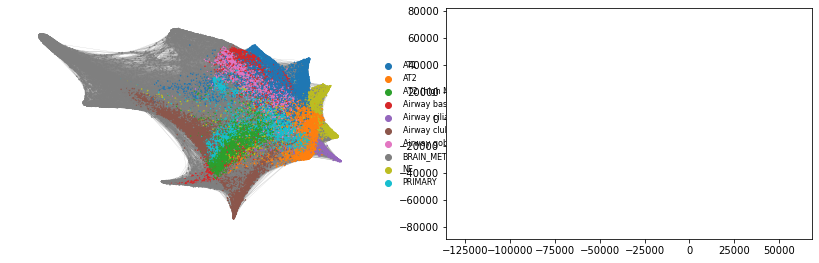

In [36]:
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2,
    size=10, edge_width_scale=0.5,  color = "annot_clusters",
    legend_loc="right margin",
    legend_fontsize=8, fontsize=0, frameon=False, edges=True)

In [ ]:
set(integrated_obj.obs["annot_clusters"])

In [ ]:
df_percentage_by_col

In [37]:
fine_colormap = {
 'AT1' :'#ff0000',
 'AT2' : '#4169e1',
 'AT2 (high MT)': '#ff8c00' ,
 'Airway basal': '#dda0dd',
 'Airway ciliated': '#00ffff',
 'Airway club': '#00fa9a',
 'Airway goblet': '#ff00ff',
 'NE' : "#00bfff",
 'Non-STK11-mut':"#ffff54" ,
 'STK11-mut' : "#800080",
 'BRAIN_METS':"#ffff54" ,
 'PRIMARY' : "#800080",
 'Non-STK11-mut (BRAIN_METS)' :"#ffff54"  ,
 'Non-STK11-mut (PRIMARY)': '#0000ff',
 'STK11-mut (BRAIN_METS)' : "#800080", 
 'STK11-mut (PRIMARY)': "#2e8b57"}
#integrated_obj.obs["annot_colors"] = integrated_obj.obs["annot_clusters"].map(fine_colormap)
#color_plot = dict(zip(integrated_obj.obs.pheno_louvain, integrated_obj.obs.annot_colors))


In [38]:
sc.tl.paga(integrated_obj, groups='annot_clusters')


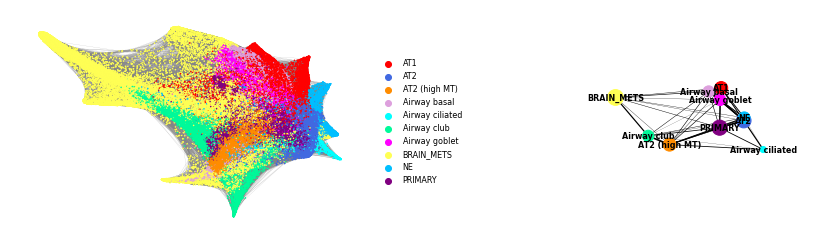

In [39]:
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2,
    size=10, edge_width_scale=0.5, palette=fine_colormap,
    legend_loc="right margin",
    legend_fontsize=8, fontsize=0, frameon=False, edges=True)

In [40]:
integrated_obj.uns['iroot'] = np.flatnonzero(integrated_obj.obs['cell_type_fine']  == 'AT2')[0]

sc.tl.dpt(integrated_obj)


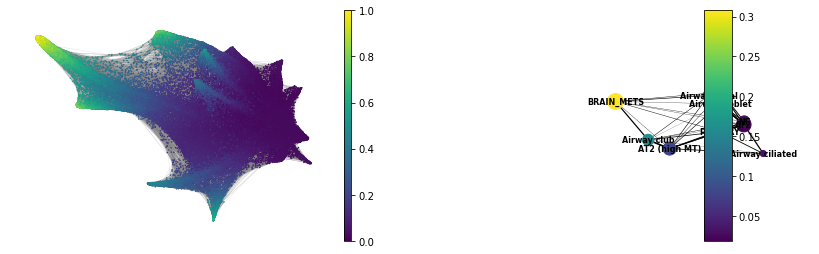

In [41]:
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2,
    size=10, edge_width_scale=0.5,  color = ["dpt_pseudotime"],
    legend_loc="right margin",
    legend_fontsize=8, fontsize=0, frameon=False, edges=True)

In [ ]:
for i,x in integrated_obj.obs.groupby("annot_clusters"):
    print(i)
    print(x["dpt_pseudotime"].mean())

In [ ]:
adjusted_time = {}
for i,x in integrated_obj.obs.groupby("Primary_vs_BM"):
    print(i)
    print(x["dpt_pseudotime"].mean())
    adjusted_time[i] = x["dpt_pseudotime"].mean()
for i,x in integrated_obj.obs.groupby("cell_type_fine"):
    print(i)
    print(x["dpt_pseudotime"].mean())
    adjusted_time[i] = x["dpt_pseudotime"].mean()
integrated_obj.obs["adjusted_time"] = integrated_obj.obs["annot_clusters"].map(adjusted_time)

In [51]:
psuedo = pd.DataFrame([(adjusted_time)])
psuedo = psuedo[sorted(adjusted_time)]
psuedo.index = ["average cell pseudotime"]
psuedo = psuedo[psuedo.sum().sort_values(ascending=False).index[:]]

psuedo

BRAIN_METS  AT2 (high MT)   PRIMARY  Airway club  \
average cell pseudotime     0.13869       0.085619  0.083887     0.073065   

                         Airway goblet  Airway ciliated  Airway basal  \
average cell pseudotime       0.062469         0.061982      0.053661   

                               NE       AT2       AT1  
average cell pseudotime  0.047651  0.038702  0.031932

In [49]:
sorted(adjusted_time)

['AT1',
 'AT2',
 'AT2 (high MT)',
 'Airway basal',
 'Airway ciliated',
 'Airway club',
 'Airway goblet',
 'NE',
 'Non-STK11-mut',
 'STK11-mut']

TypeError: sequence item 0: expected str instance, numpy.float64 found

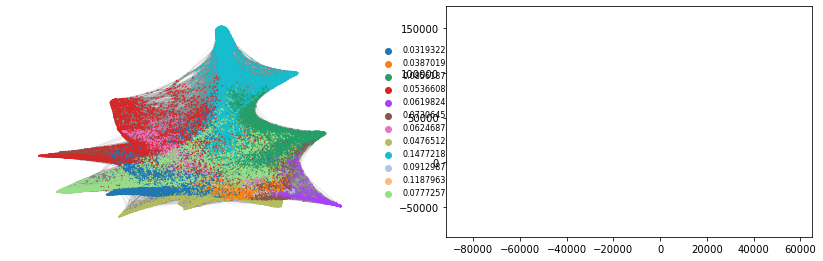

In [75]:
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2,
    size=10, edge_width_scale=0.5,  color = ["adjusted_time"],
    legend_loc="right margin",
    legend_fontsize=8, fontsize=0, frameon=False, edges=True, node_size_scale =5)

In [76]:
integrated_obj.obs["adjusted_time"] 

/home/ubuntu/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


Tumor_PA001_GCGAGAAGTACTTAGC-1    0.053661
Tumor_PA001_TCGGTAAAGGCAAAGA-1    0.077726
Tumor_PA001_CTCTAATCATGAGCGA-1    0.077726
Tumor_PA001_CTTTGCGAGACTGTAA-1    0.077726
Tumor_PA001_GTTACAGTCCAGAGGA-1    0.077726
                                    ...   
Control_CATACAGGTCGAGCTC-1_6      0.077726
Control_TTCTAACCACGATAGG-1_6      0.031932
Control_GTCATCCCAGCTACTA-1_6      0.085619
Control_AGGTTGTCAGCTTTGA-1_6      0.061982
Control_AGCGTCGGTGCTTCAA-1_6      0.062469
Name: adjusted_time, Length: 177230, dtype: category
Categories (12, float64): [0.031932, 0.038702, 0.085619, 0.053661, ..., 0.147722, 0.091299, 0.118796, 0.077726]

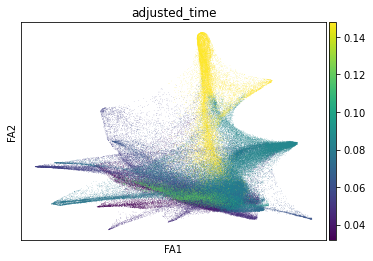

In [77]:
integrated_obj.obs['adjusted_time'] = integrated_obj.obs['adjusted_time'].astype(float)
sc.pl.draw_graph(integrated_obj, color=["adjusted_time"])

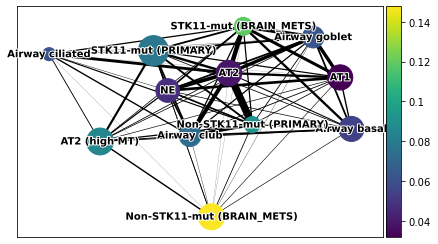

In [78]:
sc.pl.paga(integrated_obj, colors= 'adjusted_time', fontsize = 10, fontoutline=2, node_size_scale = 4)


In [ ]:
#sc.tl.draw_graph(integrated_obj, init_pos='paga')
#sc.tl.umap(integrated_obj, init_pos='paga')


In [ ]:
sc.pl.draw_graph(integrated_obj, color=["adjusted_time"])
sc.tl.paga(integrated_obj, groups='annot_clusters')
sc.pl.paga(integrated_obj)

In [ ]:
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2,
    size=10, edge_width_scale=0.5,  color = ["adjusted_time"],
    legend_loc="right margin",
    legend_fontsize=8, fontsize=0, frameon=False, edges=True)

In [ ]:
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2,
    size=10, edge_width_scale=0.5, 
    legend_loc="right margin",
    legend_fontsize=8, fontsize=0, frameon=False, edges=True)

In [ ]:
sc.pl.paga(integrated_obj, colors= 'adjusted_time', fontsize = 10, fontoutline=2, node_size_scale = 4)


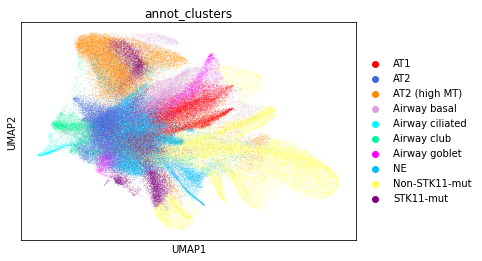

In [255]:
sc.pl.umap(integrated_obj,  color= ['annot_clusters' ], palette=fine_colormap)


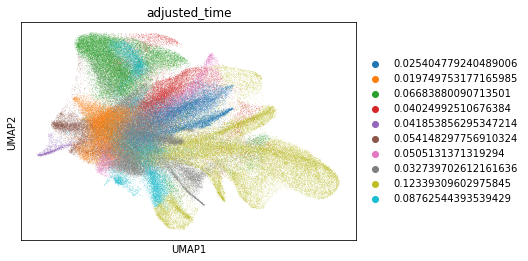

In [257]:
sc.pl.umap(integrated_obj,  color= ['adjusted_time' ])


In [161]:

cluster_dictionary = []
labels = []
rows = []
indexes = []
for i,x in integrated_obj.obs.groupby('pheno_louvain'):
    indexes.append(i)
    row = []
    object_row = x['STK11mut_vs_NonSTK11mut'].value_counts().to_dict() | x['Primary_vs_BM'].value_counts().to_dict() 
    object_row = object_row | x['celltype_bped_fine'].value_counts().to_dict() 
    #object_row =object_row | x['cell_type_fine'].value_counts().to_dict()
    rows.append(object_row)
df= pd.DataFrame(rows)
df.columns


df = df.loc[:, (df.sum() >= 50) ]
labels = list(df.columns)
df_percentage_by_row = df.copy()
df_percentage_by_row[labels] = df[labels].div(df[labels].sum(axis=1), axis=0)
df_percentage_by_col = df.copy()
df_percentage_by_col = df[labels].div(df[labels].sum(axis=0), axis=1)
df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]
#df_percentage_by_col = df_percentage_by_col.drop(['Epithelial cells', 'BRAIN_METS', 'PRIMARY'], axis = 1)
df_percentage_by_col = df_percentage_by_col.drop(['BRAIN_METS', 'PRIMARY'], axis = 1)



res = {indexes[i]: list(df_percentage_by_col.idxmax(axis = 1).values)[i] for i in range(len(indexes))}

integrated_obj.obs["annot_clusters"] = integrated_obj.obs["pheno_louvain"].map(res)

In [166]:
integrated_obj.obs["annot_clusters"]

Tumor_PA001_GCGAGAAGTACTTAGC-1    Erythrocytes
Tumor_PA001_TCGGTAAAGGCAAAGA-1        Myocytes
Tumor_PA001_CTCTAATCATGAGCGA-1    CD8+ T-cells
Tumor_PA001_CTTTGCGAGACTGTAA-1    CD8+ T-cells
Tumor_PA001_GTTACAGTCCAGAGGA-1       STK11-mut
                                      ...     
Control_CATACAGGTCGAGCTC-1_6          Myocytes
Control_TTCTAACCACGATAGG-1_6         Pericytes
Control_GTCATCCCAGCTACTA-1_6         Monocytes
Control_AGGTTGTCAGCTTTGA-1_6       Melanocytes
Control_AGCGTCGGTGCTTCAA-1_6       Fibroblasts
Name: annot_clusters, Length: 177230, dtype: category
Categories (23, object): ['Astrocytes', 'CD4+ Tcm', 'CD8+ T-cells', 'Eosinophils', ..., 'Non-STK11-mut', 'Pericytes', 'STK11-mut', 'mv Endothelial cells']

In [164]:
sc.tl.paga(integrated_obj, groups='annot_clusters')

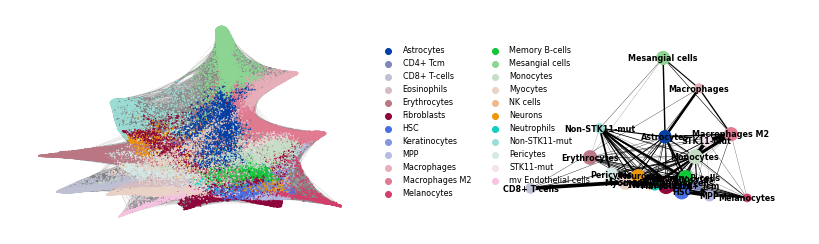

In [167]:
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2,
    size=10, edge_width_scale=0.5,  palette=fine_colormap,
    legend_loc="right margin",
    legend_fontsize=8, fontsize=0, frameon=False, edges=True)

In [ ]:
sc.tl.paga(integrated_obj, groups='pheno_louvain')

In [ ]:
sc.pl.paga(integrated_obj, colors= 'pheno_louvain', fontsize = 1)
sc.pl.paga_compare(
    integrated_obj, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=0, frameon=False, edges=True)

In [ ]:
sc.pl.draw_graph(integrated_obj, color=["orig.ident",'STK11mut_vs_NonSTK11mut',
                                        'Primary_vs_BM', 'Primary_BM_STK_NonSTK'])

In [ ]:
sc.pl.draw_graph(integrated_obj, color=["celltype_mid_main"])

In [ ]:
#sc.tl.draw_graph(integrated_obj, init_pos='paga')


In [30]:
integrated_obj

AnnData object with n_obs × n_vars = 177230 × 500
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rps', 'percent.rpl', 'percent.rp', 'patient_long', 'patient', 'predicted_doublets', 'doublet_scores', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'celltype_bped_main', 'celltype_bped_fine', 'celltype_iced_main', 'celltype_iced_fine', 'celltype_hpca_main', 'celltype_hpca_fine', 'celltype_mid_main', 'celltype_mid_fine', 'Primary_vs_BM', 'STK11mut_vs_NonSTK11mut', 'Primary_BM_STK_NonSTK', 'Primary_vs_BM_vs_CHEST_WALL_MET', 'Primary_BM_STK_NonSTK_CHEST_WALL_MET', 'organ', 'group', 'ID', 'sequencing', 'RNA_snn_res.0.8', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'cell_type_fine', 'integrated_snn_res.0.5', 'pheno_louvain'
    uns: 'pca', 'neighbors', 'diffmap_evals', 'umap', 'draw_graph', 'orig.ident_colors', 'pheno_jaccard_q', 'paga', 'pheno_louvain_sizes', 'pheno_l

In [47]:
integrated_obj.obs["PAGA_Graph"]

Tumor_PA001_GCGAGAAGTACTTAGC-1    Non-STK11-mut (BRAIN_METS)
Tumor_PA001_TCGGTAAAGGCAAAGA-1    Non-STK11-mut (BRAIN_METS)
Tumor_PA001_CTCTAATCATGAGCGA-1    Non-STK11-mut (BRAIN_METS)
Tumor_PA001_CTTTGCGAGACTGTAA-1    Non-STK11-mut (BRAIN_METS)
Tumor_PA001_GTTACAGTCCAGAGGA-1    Non-STK11-mut (BRAIN_METS)
                                             ...            
Control_CATACAGGTCGAGCTC-1_6                     Macrophages
Control_TTCTAACCACGATAGG-1_6                    Chondrocytes
Control_GTCATCCCAGCTACTA-1_6                       Monocytes
Control_AGGTTGTCAGCTTTGA-1_6                      Adipocytes
Control_AGCGTCGGTGCTTCAA-1_6                    Chondrocytes
Name: PAGA_Graph, Length: 177230, dtype: category
Categories (29, string): [Adipocytes, Astrocytes, B-cells, CD4+ T-cells, ..., STK11-mut (BRAIN_METS), STK11-mut (PRIMARY), Skeletal muscle, Smooth muscle]

In [50]:
integrated_obj.obs["PAGA_Graph"] = integrated_obj.obs['Primary_BM_STK_NonSTK'].astype('string').fillna(
    integrated_obj.obs['celltype_mid_main'].astype('string'))


In [77]:
epi_cells = pd.read_csv("Epithelial_Ctrl_metadata-2.csv")

def match_cells(index):
    if ("Control_" in index):
        for x in list(epi_cells['barcode_orig']):

            if x in index:
                
                return ( list(epi_cells[epi_cells['barcode_orig'] == x]["cell_type_fine"])[0])

integrated_obj.obs["cell_type_fine"] = integrated_obj.obs.apply(lambda x: match_cells(x.name), axis = 1)

In [78]:
print(set(integrated_obj.obs["cell_type_fine"]))

{'AT2', 'AT2 (high MT)', None, 'Airway ciliated', 'Airway basal', 'AT1', 'Airway club', 'Airway goblet', 'NE'}


In [ ]:
fine_colormap = {
 'AT1' :'#ff0000',
 'AT2' : '#4169e1',
 'AT2 (high MT)': '#ff8c00' ,
 'Airway basal': '#dda0dd',
 'Airway ciliated': '#00ffff',
 'Airway club': '#00fa9a',
 'Airway goblet': '#ff00ff',
 'NE' : "#00bfff"}


sc.pl.draw_graph(integrated_obj, color=["orig.ident",'STK11mut_vs_NonSTK11mut','Primary_vs_BM'],
                wspace = 1)


In [ ]:
sc.pl.draw_graph(integrated_obj, color='cell_type_fine', palette=fine_colormap, size = 10,
                wspace = 1)

In [62]:
integrated_obj.uns['iroot'] = np.flatnonzero(integrated_obj.obs['cell_type_fine']  == 'Airway club')[0]

sc.tl.dpt(integrated_obj)


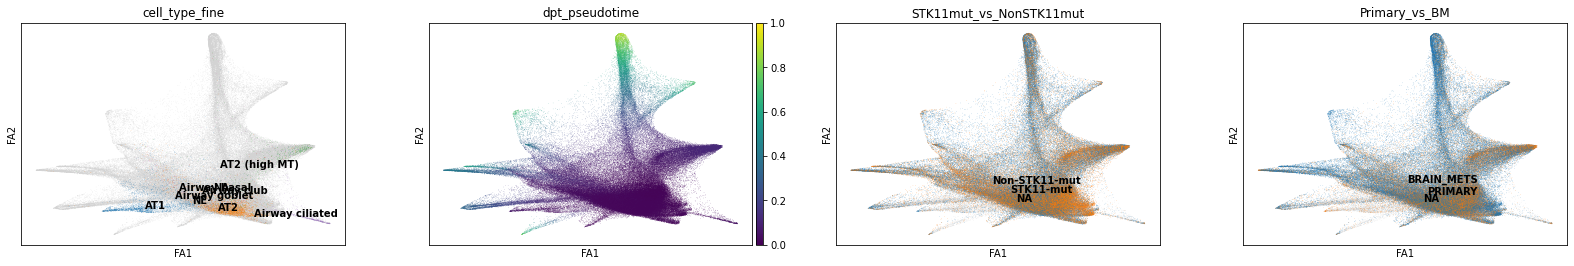

In [63]:
sc.pl.draw_graph(integrated_obj, color=['cell_type_fine', 'dpt_pseudotime',
                                        'STK11mut_vs_NonSTK11mut' ,'Primary_vs_BM'], legend_loc='on data')


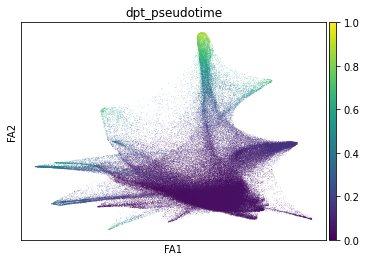

In [34]:
sc.pl.draw_graph(integrated_obj, color=[ 'dpt_pseudotime'], legend_loc='on data')

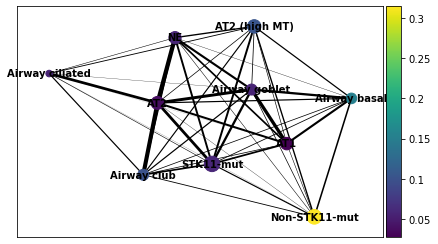

In [35]:
sc.pl.paga(integrated_obj, colors= 'dpt_pseudotime', fontsize = 10)


In [83]:
import scvelo as scv
scv.pp.moments(integrated_obj)



In [80]:
scv.tl.velocity(integrated_obj, mode='stochastic')


computing velocities


KeyError: 'Ms'

In [82]:
list(integrated_obj.layers.keys()
)

[]

In [76]:
set(integrated_obj.obs['STK11mut_vs_NonSTK11mut'])

{'Non-STK11-mut', 'STK11-mut', nan}

In [89]:
len(set(integrated_obj.obs[integrated_obj.obs['Primary_vs_BM'] == 'BRAIN_METS']['patient']))

35

In [97]:
tot = set(integrated_obj.obs[integrated_obj.obs['Primary_vs_BM'] == 'PRIMARY']['orig.ident']) & set(integrated_obj.obs[integrated_obj.obs['Primary_vs_BM'] == 'BRAIN_METS']['orig.ident'])

In [98]:
tot

{'KRAS_13', 'KRAS_17', 'STK_20', 'STK_22dot2'}

In [96]:
tot - set(integrated_obj.obs[integrated_obj.obs['STK11mut_vs_NonSTK11mut'] == 'STK11-mut']['orig.ident']) - set(integrated_obj.obs[integrated_obj.obs['STK11mut_vs_NonSTK11mut'] == 'Non-STK11-mut']['orig.ident'])

set()

In [112]:
temp = integrated_obj.obs.copy()
temp = temp[temp.apply(lambda x: "ctr" in x["orig.ident"], axis = 1)]
temp

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
Control_TAGGTACCATGGCCAC-1_1     C51ctr       24256          6764    0.630772   
Control_ATTCACTGTAACAGGC-1_1     C51ctr       19014          6680    2.124080   
Control_TAACTTCCAACCACGC-1_1     C51ctr       15643          5156    1.412592   
Control_TTGGGTACACGACAAG-1_1     C51ctr       15217          4897    0.019711   
Control_AGGCCACAGAGTCACG-1_1     C51ctr       13217          5544    3.155028   
...                                 ...         ...           ...         ...   
Control_CATACAGGTCGAGCTC-1_6     C57ctr         419           357    1.193317   
Control_TTCTAACCACGATAGG-1_6     C57ctr         425           354    0.000000   
Control_GTCATCCCAGCTACTA-1_6     C57ctr         417           344    2.877698   
Control_AGGTTGTCAGCTTTGA-1_6     C57ctr         420           372    1.904762   
Control_AGCGTCGGTGCTTCAA-1_6     C57ctr         401           348    0.000000   

                              percent.rps  percent.rpl  percent.rp  \
Control_TAGGTACCATGGCCAC-1_1     0.177276     0.144294    0.321570   
Control_ATTCACTGTAACAGGC-1_1     0.347003     0.373291    0.720294   
Control_TAACTTCCAACCACGC-1_1     0.677533     0.798977    1.476510   
Control_TTGGGTACACGACAAG-1_1     0.032852     0.032852    0.065703   
Control_AGGCCACAGAGTCACG-1_1     0.348037     0.378301    0.726337   
...                                   ...          ...         ...   
Control_CATACAGGTCGAGCTC-1_6     0.238663     0.000000    0.238663   
Control_TTCTAACCACGATAGG-1_6     0.235294     0.000000    0.235294   
Control_GTCATCCCAGCTACTA-1_6     0.239808     0.239808    0.479616   
Control_AGGTTGTCAGCTTTGA-1_6     0.238095     0.000000    0.238095   
Control_AGCGTCGGTGCTTCAA-1_6     0.000000     0.000000    0.000000   

                             patient_long patient  predicted_doublets  ...  \
Control_TAGGTACCATGGCCAC-1_1          NaN  C51ctr                   0  ...   
Control_ATTCACTGTAACAGGC-1_1          NaN  C51ctr                   0  ...   
Control_TAACTTCCAACCACGC-1_1          NaN  C51ctr                   0  ...   
Control_TTGGGTACACGACAAG-1_1          NaN  C51ctr                   0  ...   
Control_AGGCCACAGAGTCACG-1_1          NaN  C51ctr                   0  ...   
...                                   ...     ...                 ...  ...   
Control_CATACAGGTCGAGCTC-1_6          NaN  C57ctr                   0  ...   
Control_TTCTAACCACGATAGG-1_6          NaN  C57ctr                   0  ...   
Control_GTCATCCCAGCTACTA-1_6          NaN  C57ctr                   0  ...   
Control_AGGTTGTCAGCTTTGA-1_6          NaN  C57ctr                   0  ...   
Control_AGCGTCGGTGCTTCAA-1_6          NaN  C57ctr                   0  ...   

                              n_genes_by_counts  total_counts  \
Control_TAGGTACCATGGCCAC-1_1             6764.0       24256.0   
Control_ATTCACTGTAACAGGC-1_1             6680.0       19014.0   
Control_TAACTTCCAACCACGC-1_1             5156.0       15643.0   
Control_TTGGGTACACGACAAG-1_1             4897.0       15217.0   
Control_AGGCCACAGAGTCACG-1_1             5544.0       13217.0   
...                                         ...           ...   
Control_CATACAGGTCGAGCTC-1_6              357.0         419.0   
Control_TTCTAACCACGATAGG-1_6              354.0         425.0   
Control_GTCATCCCAGCTACTA-1_6              344.0         417.0   
Control_AGGTTGTCAGCTTTGA-1_6              372.0         420.0   
Control_AGCGTCGGTGCTTCAA-1_6              348.0         401.0   

                              total_counts_mt  pct_counts_mt  cell_type_fine  \
Control_TAGGTACCATGGCCAC-1_1            153.0       0.630772             NaN   
Control_ATTCACTGTAACAGGC-1_1            404.0       2.124750             NaN   
Control_TAACTTCCAACCACGC-1_1            221.0       1.412773             NaN   
Control_TTGGGTACACGACAAG-1_1              3.0       0.019715             NaN   
Control_AGGCCACAGAGTCACG-1_1            417.0       3.155028             NaN   
...              

In [115]:
from collections import Counter

Counter(temp['celltype_bped_main']).most_common()

[('Epithelial cells', 8352),
 ('Adipocytes', 3455),
 ('Macrophages', 3056),
 ('Endothelial cells', 2585),
 ('CD4+ T-cells', 2334),
 ('Chondrocytes', 2014),
 ('B-cells', 2007),
 ('Fibroblasts', 1488),
 ('CD8+ T-cells', 1407),
 ('Monocytes', 1376),
 ('Neurons', 931),
 ('NK cells', 813),
 ('Melanocytes', 727),
 ('Smooth muscle', 588),
 ('Skeletal muscle', 408),
 ('Eosinophils', 287),
 (nan, 271),
 ('DC', 189),
 ('HSC', 179),
 ('Mesangial cells', 67),
 ('Neutrophils', 57),
 ('Myocytes', 45),
 ('Pericytes', 29),
 ('Erythrocytes', 7),
 ('Astrocytes', 3),
 ('Keratinocytes', 1)]

In [ ]:
'celltype_bped_main',
       'celltype_bped_fine', 'celltype_iced_main', 'celltype_iced_fine',
       'celltype_hpca_main', 'celltype_hpca_fine', 'celltype_mid_main',
       'celltype_mid_fine'

In [122]:
stri = ''
for x in pd.read_excel("../Epithelial_lung_signature.xlsx", sheet_name='Epithelial_lung').columns:
    stri = stri + x + ", "
stri

'CLUB, CILIATED, BASAL, GOBLET, MUCOUS, SEROUS, IONOCYTE, NEUROENDOCRINE, TUFT, AT1, AT2, DATP, AEC2, AEC1, PNECS, AEP, '